In [1]:
import os
import sys
import glob
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from functools import partial

from matplotlib.colors import LogNorm

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["font.size"]      = 11

In [5]:
import re

evts_path = '/Users/romoluque_c/LEGEND/BACON/new_setup/data_npz_run3/'

all_chs = range(13)

def extract_date_and_number(filename):
    match = re.search(r"(\d{2}_\d{2}_\d{4})-file_(\d+)", filename)
    return match.group(1), int(match.group(2))

files        = glob.glob(evts_path + 'BACoN_data_basic_info_run*.npz')
sorted_files = sorted(files, key=extract_date_and_number)

In [6]:
sorted_files;

In [7]:
bsl_mean_i_dict = {}
bsl_mode_i_dict = {}
bsl_mean_f_dict = {}
bsl_mode_f_dict = {}
std_all_dict    = {}
max_all_dict    = {}

all_chs = range(13)

for filename in sorted_files:
    d       = np.load(filename, allow_pickle=True)
    date, _ = extract_date_and_number(filename)
    
    if date not in bsl_mean_i_dict:
        print(date)
        bsl_mean_i_dict[date] = {ch: d['bsl_mean_i_dict'].item()[ch] for ch in all_chs}
        bsl_mode_i_dict[date] = {ch: d['bsl_mode_i_dict'].item()[ch] for ch in all_chs}
        bsl_mean_f_dict[date] = {ch: d['bsl_mean_f_dict'].item()[ch] for ch in all_chs}
        bsl_mode_f_dict[date] = {ch: d['bsl_mode_f_dict'].item()[ch] for ch in all_chs}
        std_all_dict   [date] = {ch: d['std_all_dict']   .item()[ch] for ch in all_chs}
        max_all_dict   [date] = {ch: d['max_all_dict']   .item()[ch] for ch in all_chs}
        continue

    for ch in all_chs:
        try:
            bsl_mean_i_dict[date][ch] = np.concatenate((bsl_mean_i_dict[date][ch], d['bsl_mean_i_dict'].item()[ch]))
            bsl_mode_i_dict[date][ch] = np.concatenate((bsl_mode_i_dict[date][ch], d['bsl_mode_i_dict'].item()[ch]))
            bsl_mean_f_dict[date][ch] = np.concatenate((bsl_mean_f_dict[date][ch], d['bsl_mean_f_dict'].item()[ch]))
            bsl_mode_f_dict[date][ch] = np.concatenate((bsl_mode_f_dict[date][ch], d['bsl_mode_f_dict'].item()[ch]))
            std_all_dict   [date][ch] = np.concatenate((std_all_dict   [date][ch], d['std_all_dict']   .item()[ch]))
            max_all_dict   [date][ch] = np.concatenate((max_all_dict   [date][ch], d['max_all_dict']   .item()[ch]))
        
        except Exception as e:
            print(date, fnum, filename, ch, str(e))
            continue

09_08_2024
09_09_2024
09_10_2024
09_11_2024
09_12_2024
09_20_2024
09_25_2024
09_28_2024
10_04_2024
10_11_2024


In [8]:
len(bsl_mean_i_dict['09_08_2024'][ch])

882460

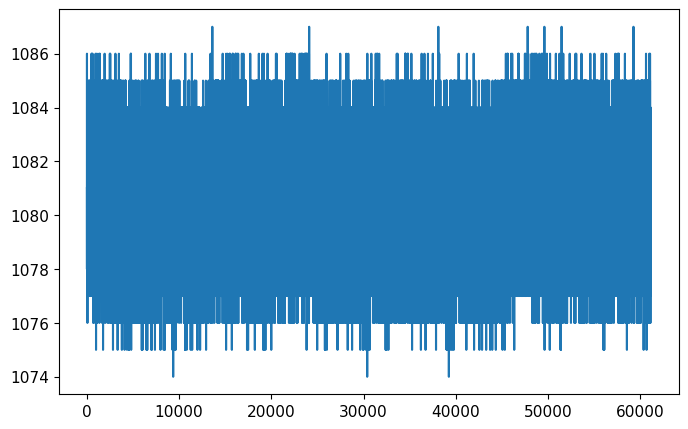

In [9]:
#plt.plot(bsl_mean_i_dict['09_08_2024'][0])
#plt.plot(bsl_mode_i_dict['09_08_2024'][0])
plt.plot(bsl_mode_i_dict['10_11_2024'][0])

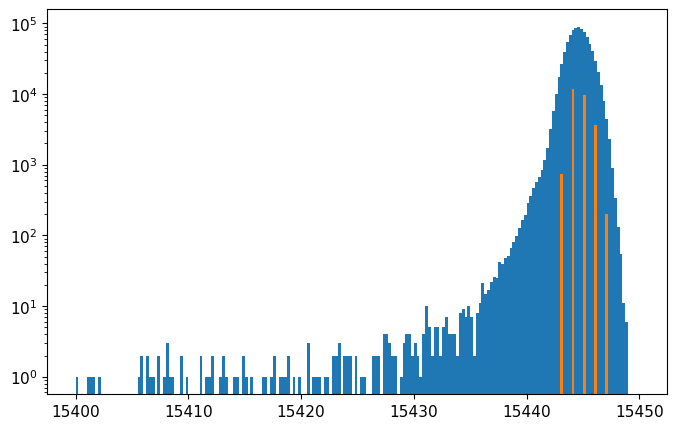

In [10]:
pmt_ch = 12
plt.hist(bsl_mean_i_dict['09_08_2024'][pmt_ch], bins=200, range=(15400, 15450), log=True);
plt.hist(bsl_mode_i_dict['09_08_2024'][pmt_ch], bins=200, range=(15400, 15450), log=True);

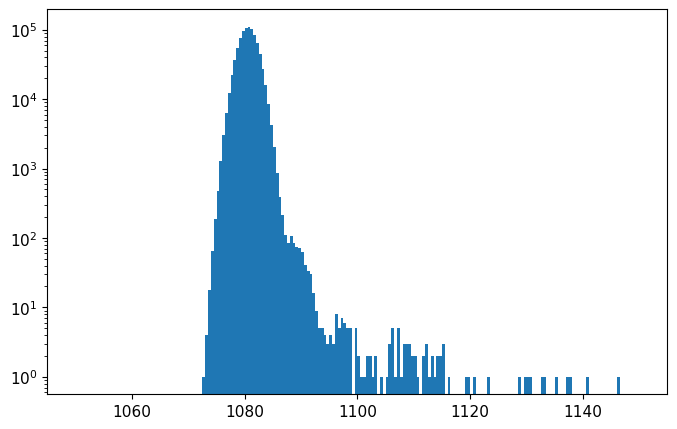

In [11]:
sipm_ch = 0
plt.hist(bsl_mean_i_dict['09_08_2024'][sipm_ch], bins=200, range=(1050, 1150), log=True);
#plt.hist(bsl_mode_i_dict['09_08_2024'][sipm_ch], bins=len(np.unique(bsl_mode_i_dict['09_08_2024'][sipm_ch])), range=(1000, 1200), log=True, alpha=0.5);

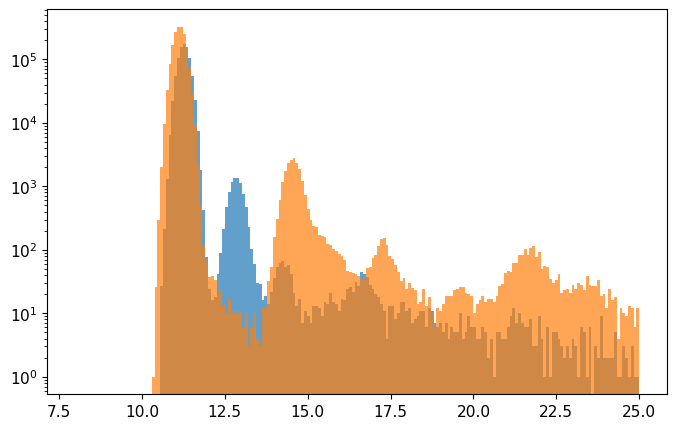

In [12]:
sipm_ch = 0
plt.hist(std_all_dict['09_08_2024'][sipm_ch], bins=200, range=(8, 25), log=True, alpha=0.7);
plt.hist(std_all_dict['10_04_2024'][sipm_ch], bins=200, range=(8, 25), log=True, alpha=0.7);

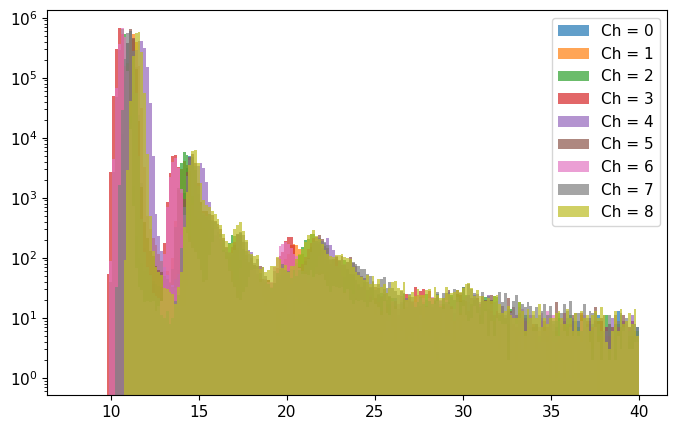

In [13]:
for sipm_ch in range(9):
    plt.hist(std_all_dict['10_04_2024'][sipm_ch], bins=200, range=(8, 40), log=True, alpha=0.7, label=f'Ch = {sipm_ch}')
plt.legend()

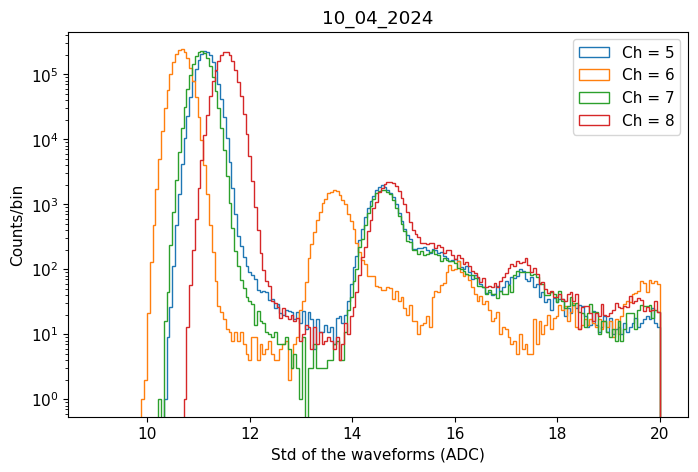

In [14]:
sel_date = '10_04_2024'
for sipm_ch in [5, 6, 7, 8]:
    plt.hist(std_all_dict[sel_date][sipm_ch], bins=200, range=(9, 20), label=f'Ch = {sipm_ch}', histtype='step', log=True)
plt.legend()
plt.title(sel_date)
plt.xlabel('Std of the waveforms (ADC)')
plt.ylabel('Counts/bin')
plt.show()

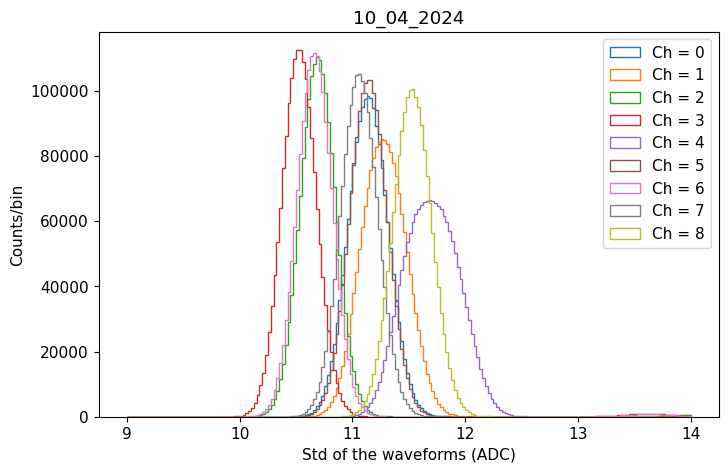

In [63]:
sel_date = '10_04_2024'
for sipm_ch in range(9):
    plt.hist(std_all_dict[sel_date][sipm_ch], bins=200, range=(9, 14), label=f'Ch = {sipm_ch}', histtype='step')
plt.legend()
plt.title(sel_date)
plt.xlabel('Std of the waveforms (ADC)')
plt.ylabel('Counts/bin')
plt.show()

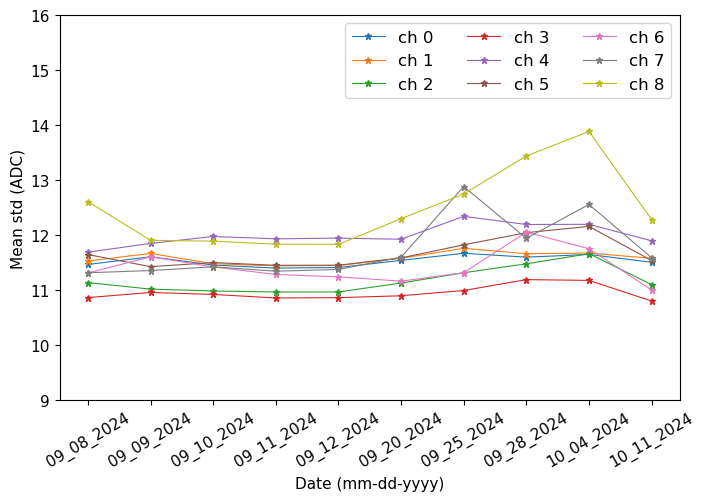

In [62]:
for ch in range(9):
    means_std = [np.mean(std_all_dict[date][ch]) for date in std_all_dict.keys()]
    plt.plot([date for date in std_all_dict.keys()], means_std, label=f'ch {ch}', lw=0.8, marker='*', markersize=5)
plt.xticks(rotation=30)
plt.ylim(9, 16)
plt.xlabel('Date (mm-dd-yyyy)')
plt.ylabel('Mean std (ADC)')
plt.legend(ncol=3, fontsize=12)
plt.show()

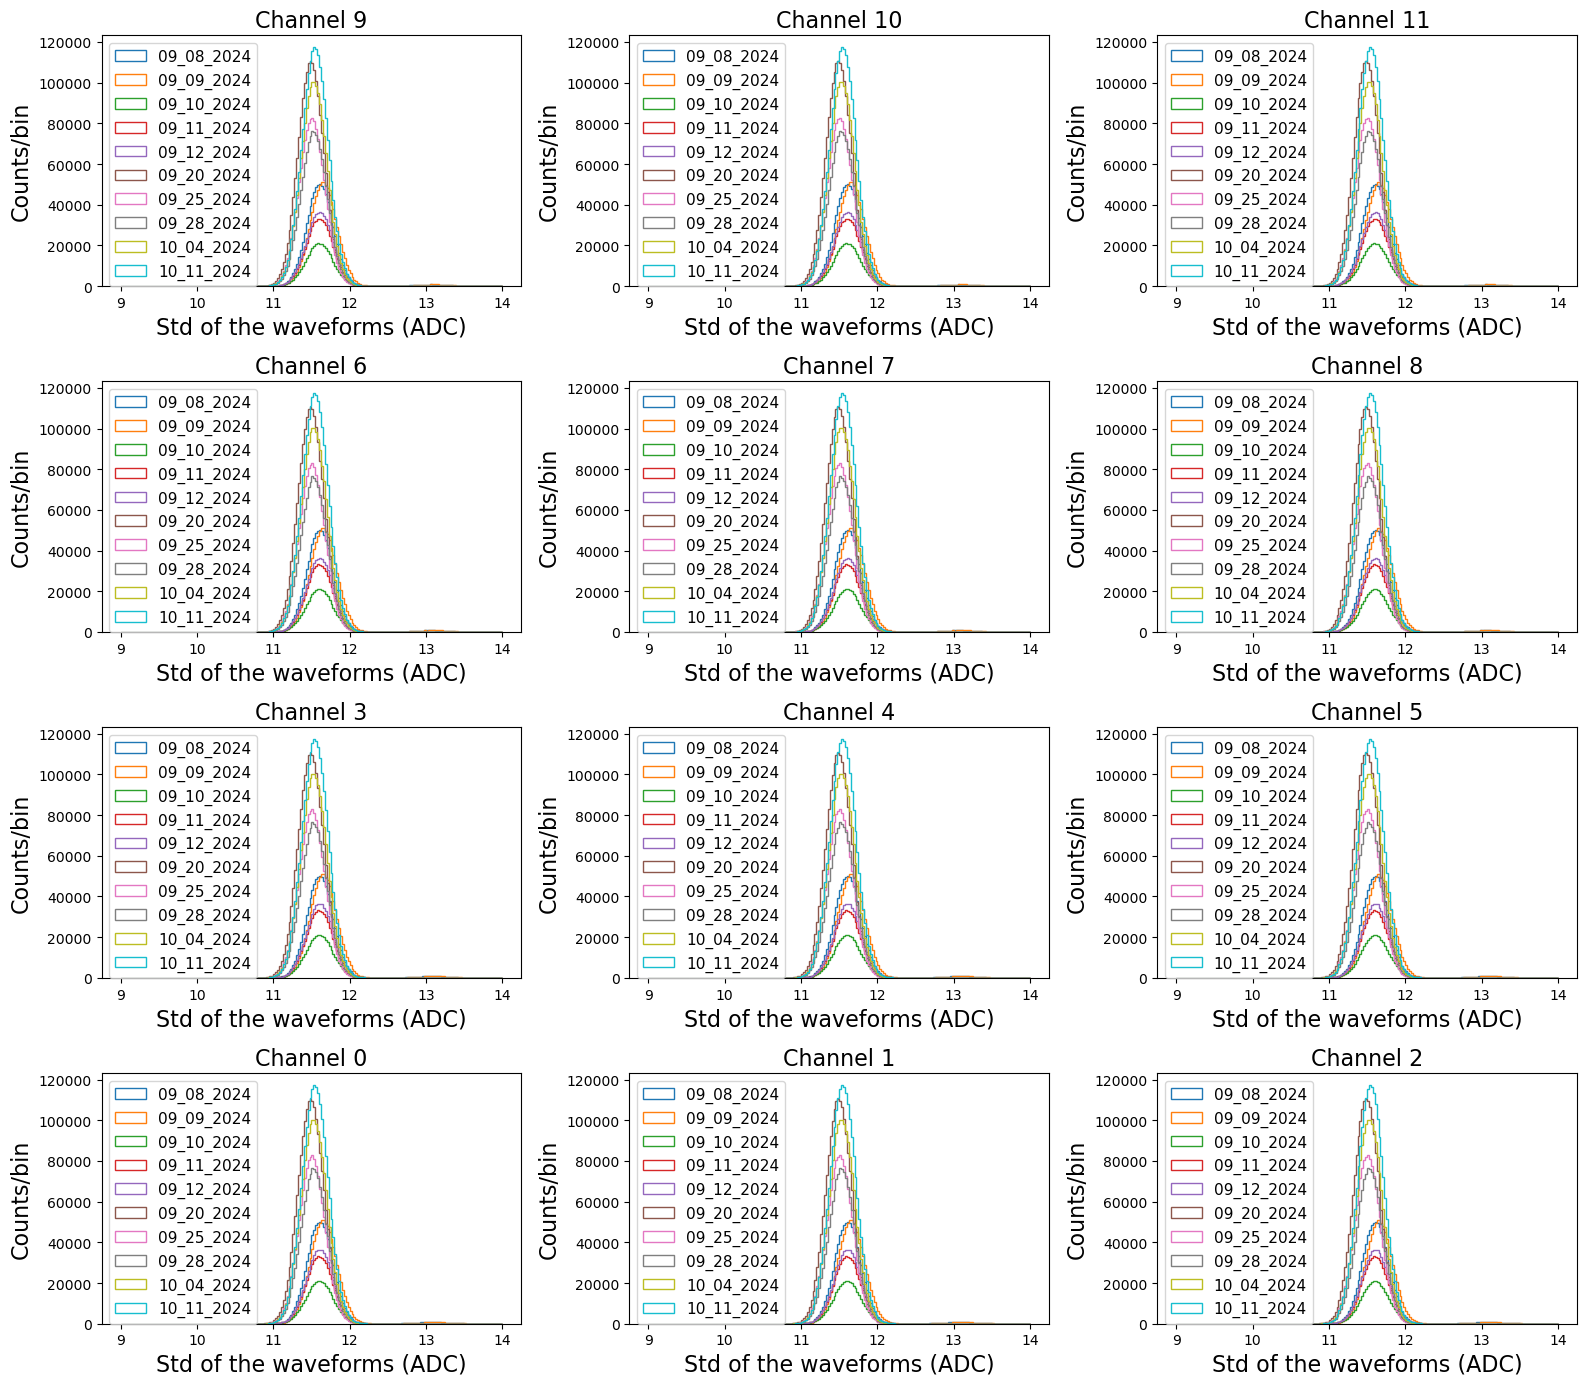

In [16]:
fig, axs   = plt.subplots(4, 3, figsize=(16, 14))
for row, ich in enumerate(reversed(np.arange(0, 12, 3))):
    for col in range(3):
        ch = ich + col
        
        for sel_date in std_all_dict.keys():
            axs[row][col].hist(std_all_dict[sel_date][sipm_ch], bins=200, range=(9, 14), label=f'{sel_date}', histtype='step')
        axs[row][col].set_xlabel('Std of the waveforms (ADC)', fontsize=16)
        axs[row][col].set_ylabel('Counts/bin',                 fontsize=16)
        axs[row][col].set_title(f"Channel {ch}",               fontsize=16)
        axs[row][col].tick_params(axis='x', labelsize=10)
        axs[row][col].tick_params(axis='y', labelsize=10)
        axs[row][col].legend()
        
plt.tight_layout()
plt.show()

### Normalize the values to 1 to compare all cases

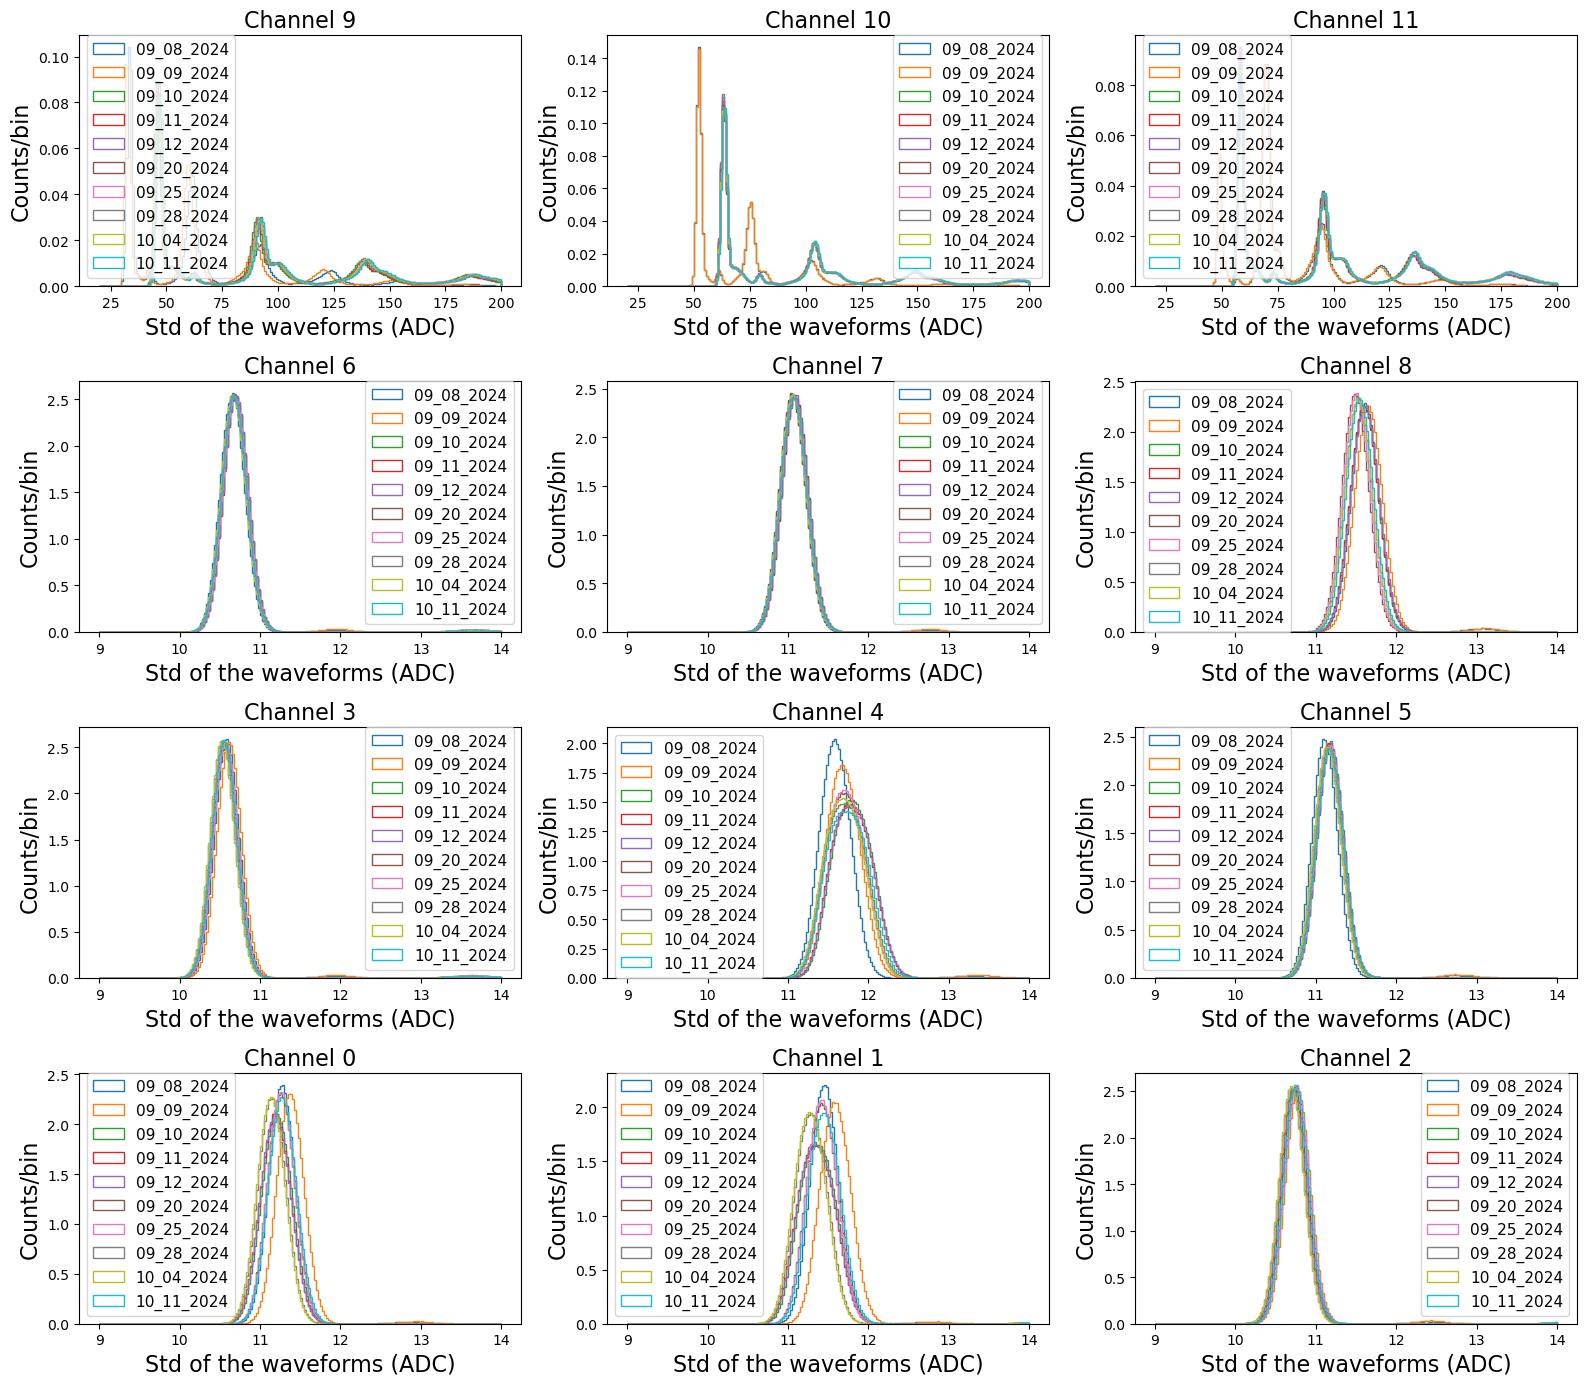

In [17]:
fig, axs   = plt.subplots(4, 3, figsize=(16, 14))
for row, ich in enumerate(reversed(np.arange(0, 12, 3))):
    for col in range(3):
        ch = ich + col
        if ch in [9, 10, 11]:
            prange = (20, 200)
        else:
            prange = (9, 14)
        for sel_date in std_all_dict.keys():
            axs[row][col].hist(std_all_dict[sel_date][ch], bins=200, range=prange, label=f'{sel_date}', histtype='step', density=True)
        axs[row][col].set_xlabel('Std of the waveforms (ADC)', fontsize=16)
        axs[row][col].set_ylabel('Counts/bin',                 fontsize=16)
        axs[row][col].set_title(f"Channel {ch}",               fontsize=16)
        axs[row][col].tick_params(axis='x', labelsize=10)
        axs[row][col].tick_params(axis='y', labelsize=10)
        axs[row][col].legend()
        #axs[row][col].set_xlim(9, 14)
        
plt.tight_layout()
plt.show()

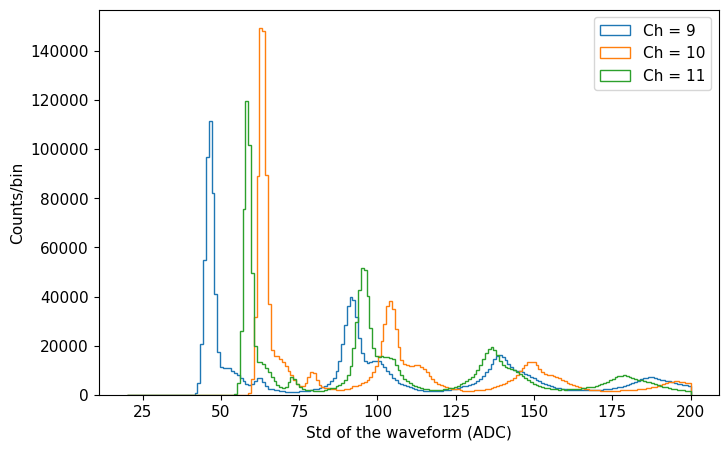

In [18]:
for sipm_ch in [9, 10, 11]:
    plt.hist(std_all_dict['10_04_2024'][sipm_ch], bins=200, range=(20, 200), label=f'Ch = {sipm_ch}', histtype='step')
plt.legend()
plt.xlabel('Std of the waveform (ADC)')
plt.ylabel('Counts/bin')
plt.show()

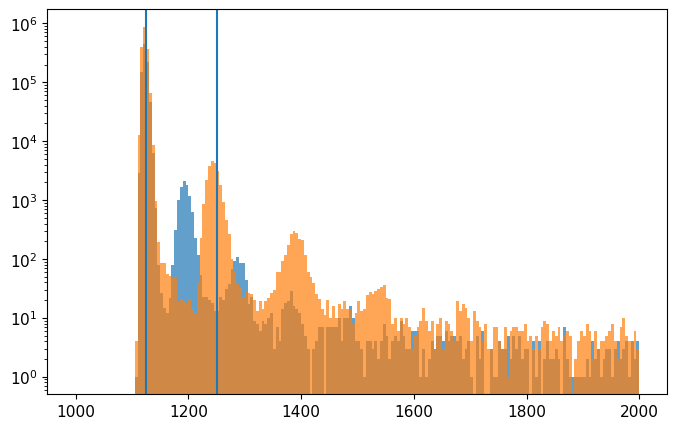

In [19]:
sipm_ch = 0
plt.hist(max_all_dict['09_08_2024'][sipm_ch], bins=200, range=(1000, 2000), log=True, alpha=0.7);
plt.hist(max_all_dict['10_04_2024'][sipm_ch], bins=200, range=(1000, 2000), log=True, alpha=0.7)
plt.axvline(1125)
plt.axvline(1250);

In [20]:
np.unique(bsl_mode_i_dict['09_08_2024'][ch])

array([1152., 1153., 1154., 1155., 1156., 1157., 1158., 1159., 1160.,
       1161., 1162., 1163., 1164.], dtype=float32)

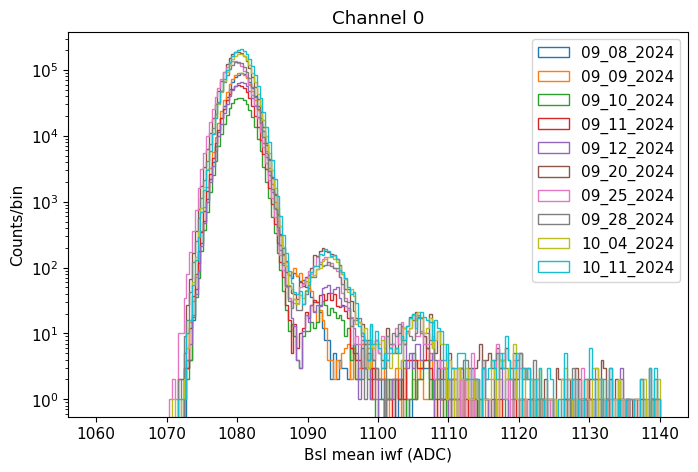

In [21]:
sipm_ch = 0
for sel_date in std_all_dict.keys():
    plt.hist(bsl_mean_i_dict[sel_date][sipm_ch], bins=200, range=(1060, 1140), label=f'{sel_date}', histtype='step', log=True)
plt.legend()
plt.title(f'Channel {sipm_ch}')
plt.xlabel('Bsl mean iwf (ADC)')
plt.ylabel('Counts/bin')
plt.show()

In [26]:
len(bsl_mean_i_dict['09_08_2024'][0])

882460

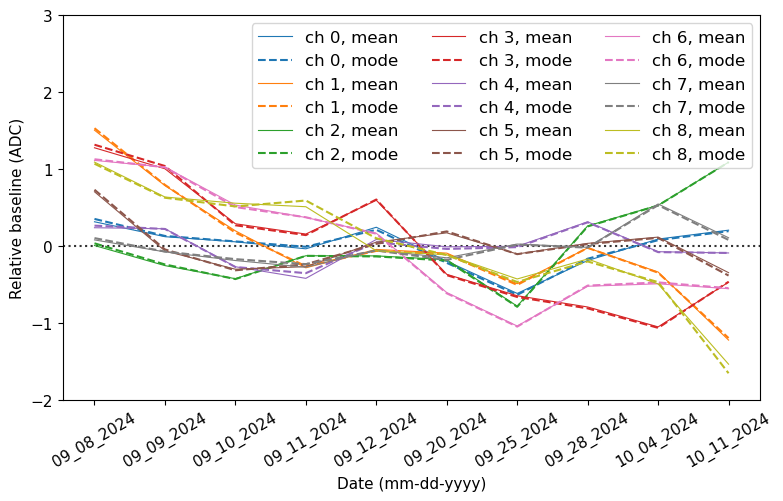

In [45]:
plt.figure(figsize=(9, 5))
plt.axhline(y=0, color='k', ls=':', alpha=0.8)
for i, (ch, col) in enumerate(zip(range(9), plt.rcParams['axes.prop_cycle'].by_key()['color'])):
    means_bsl_i_mean = [np.mean(bsl_mean_i_dict[date][ch]) for date in bsl_mean_i_dict.keys()]
    means_bsl_i_mode = [np.mean(bsl_mode_i_dict[date][ch]) for date in bsl_mode_i_dict.keys()]
    plt.plot([date for date in bsl_mean_i_dict.keys()], means_bsl_i_mean - np.mean(means_bsl_i_mean), c=col, label=f'ch {ch}, mean', lw=0.8)
    plt.plot([date for date in bsl_mode_i_dict.keys()], means_bsl_i_mode - np.mean(means_bsl_i_mode), ls='--', c=col, label=f'ch {ch}, mode')
plt.xticks(rotation=30)
plt.legend(ncol=3, fontsize=12)
plt.ylim(-2, 3)
plt.xlabel('Date (mm-dd-yyyy)')
plt.ylabel('Relative baseline (ADC)')
#plt.savefig('/global/homes/r/romo/BACoN_analysis/Run3/plots/baselines_rel1.pdf', dpi=300, bbox_inches='tight')
plt.show()

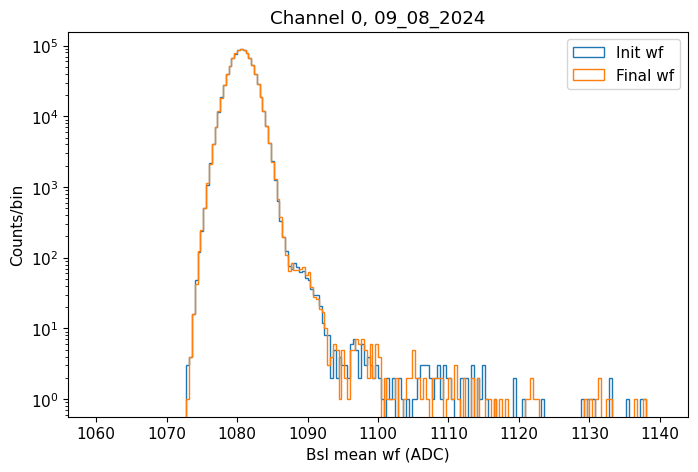

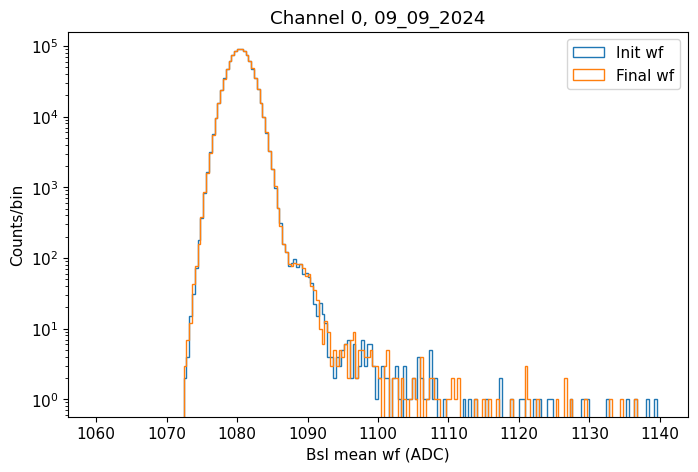

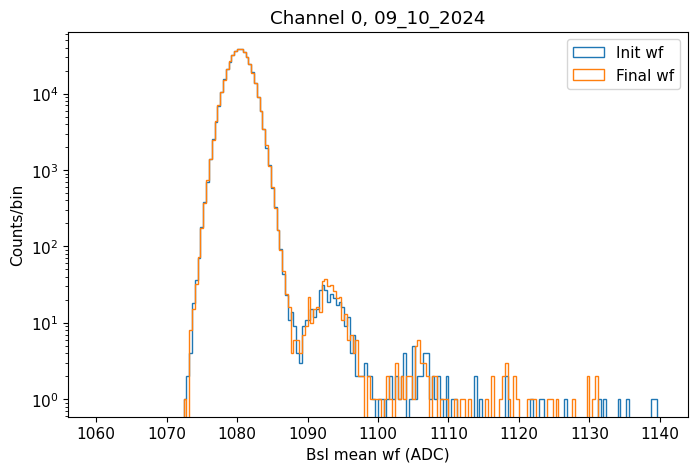

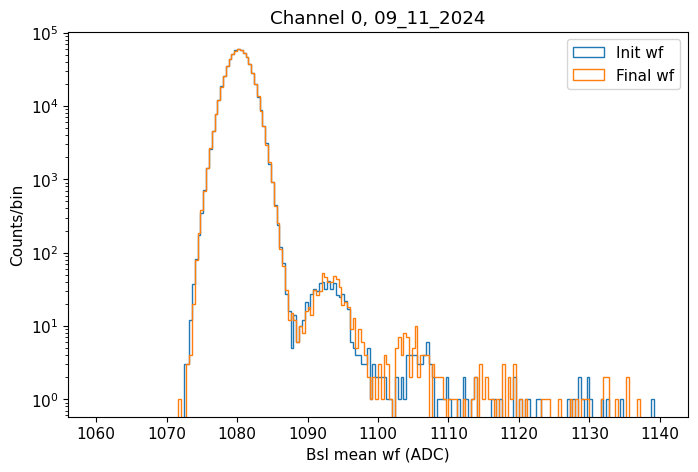

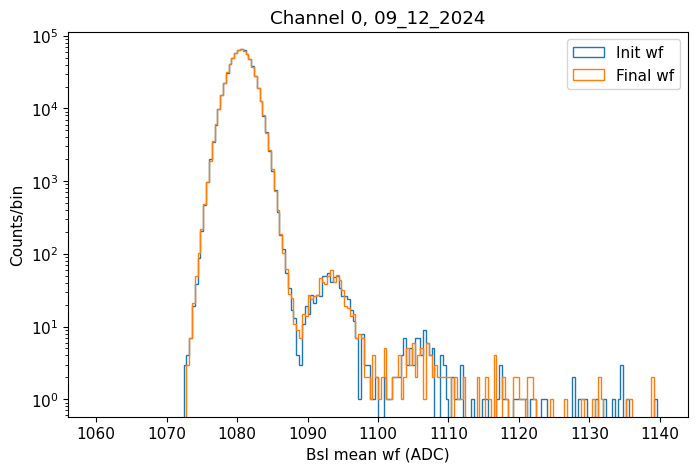

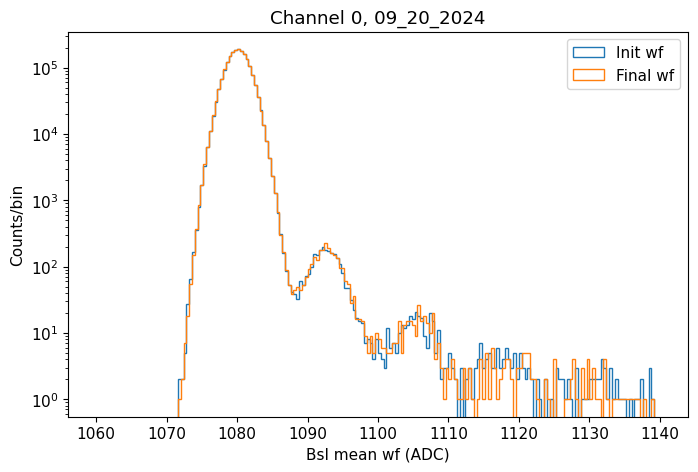

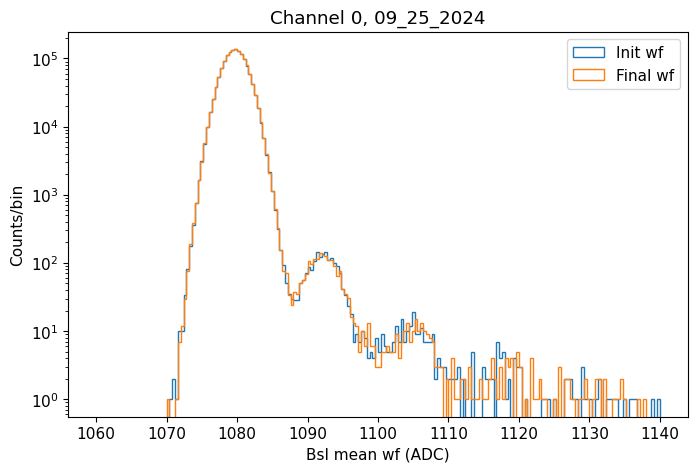

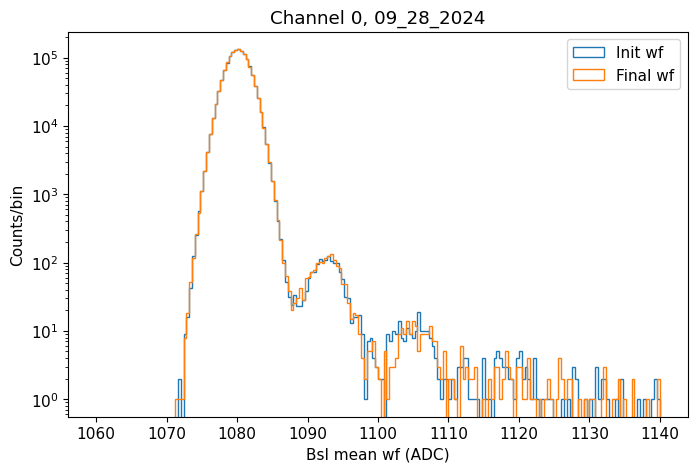

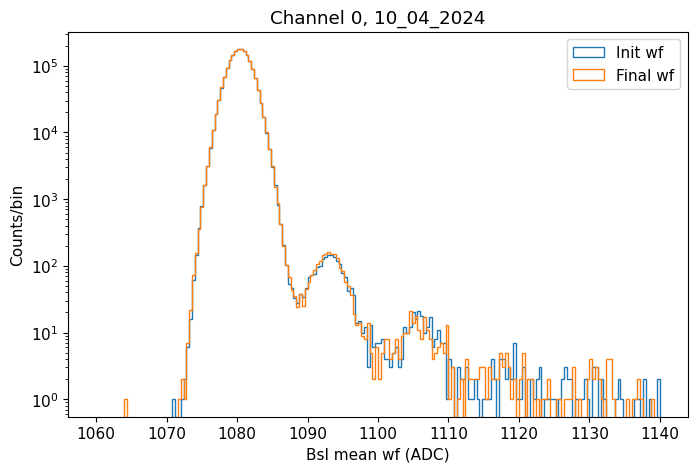

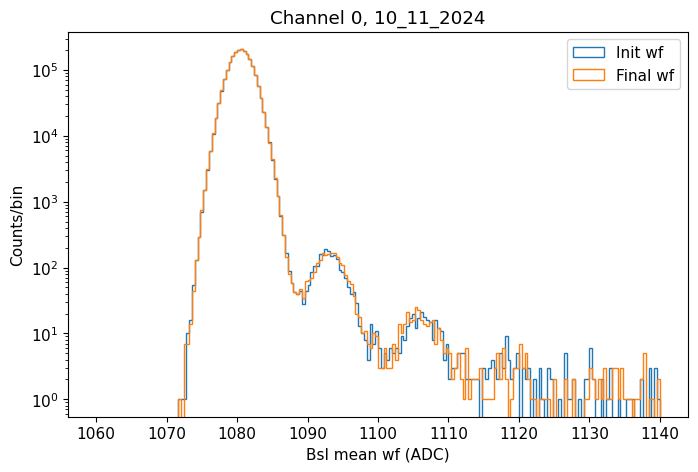

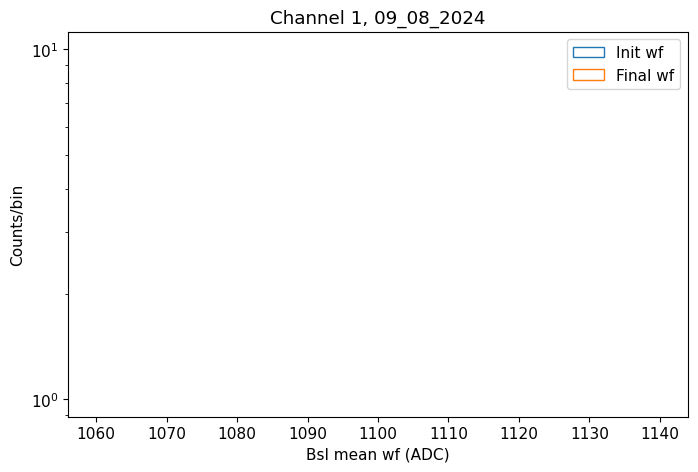

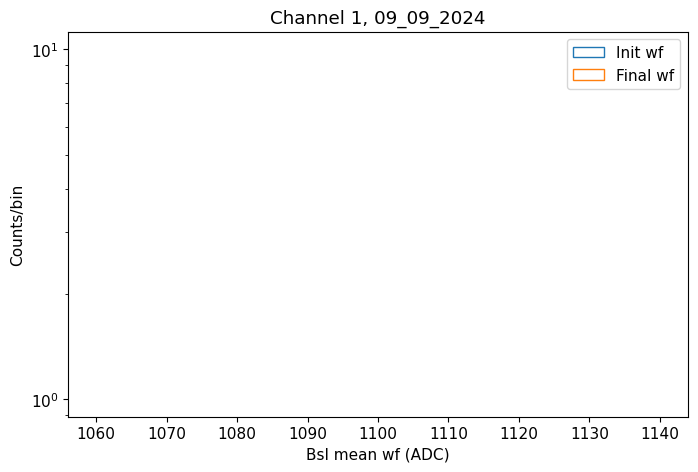

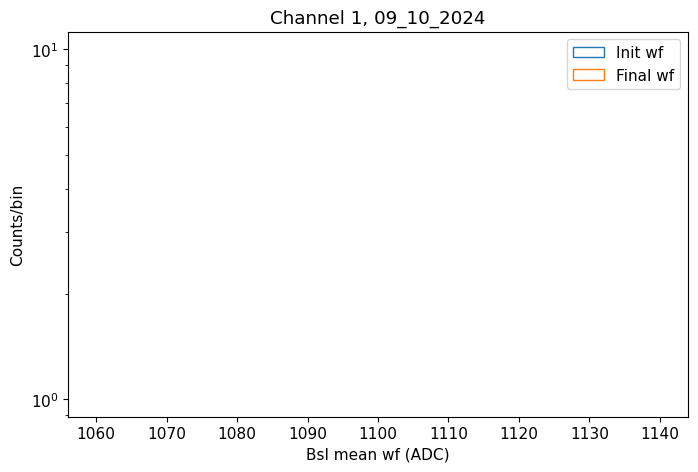

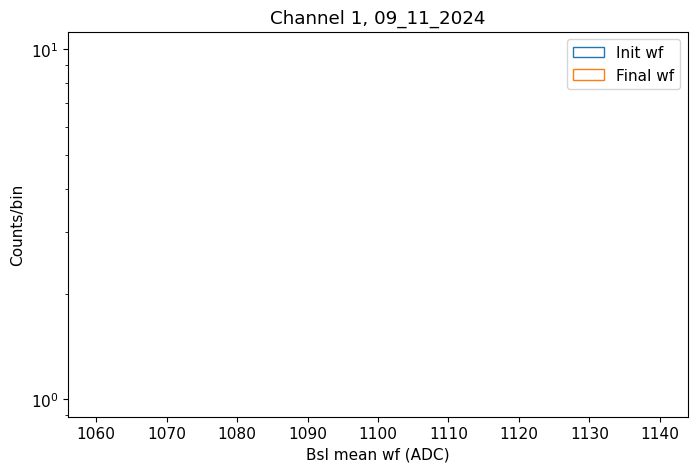

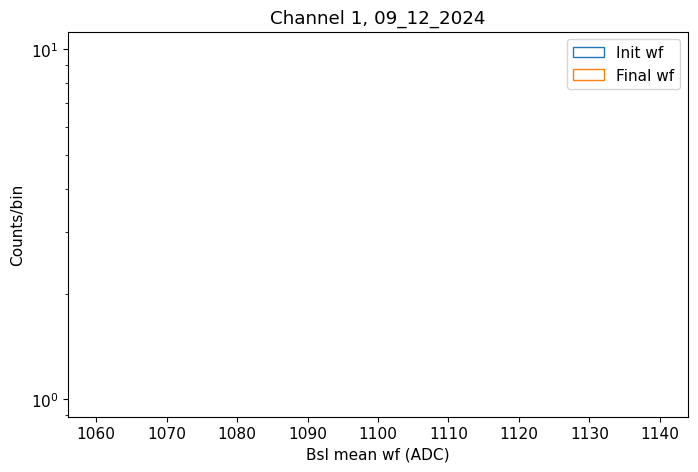

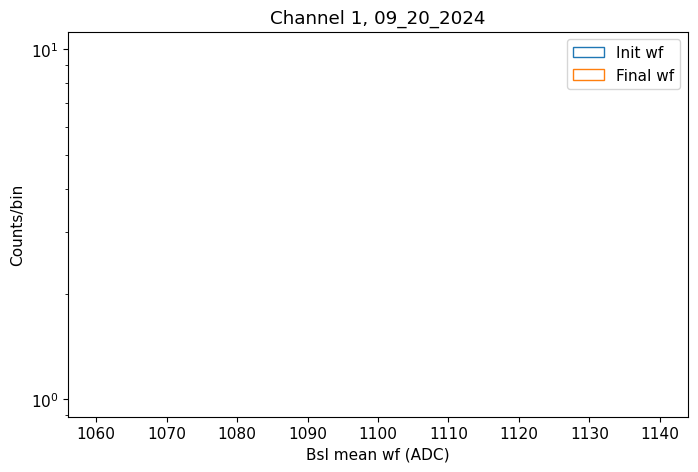

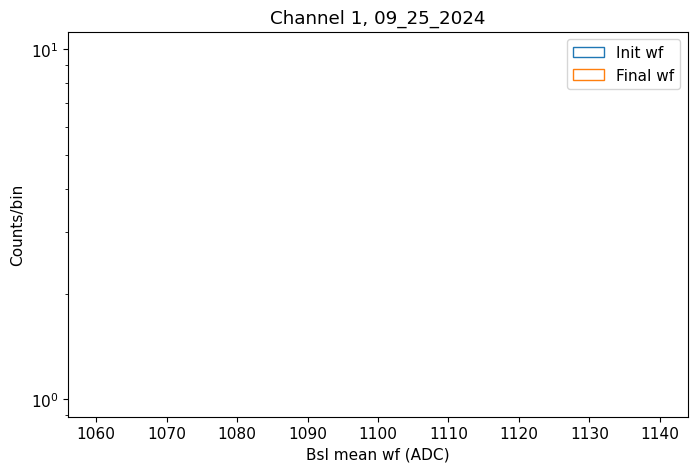

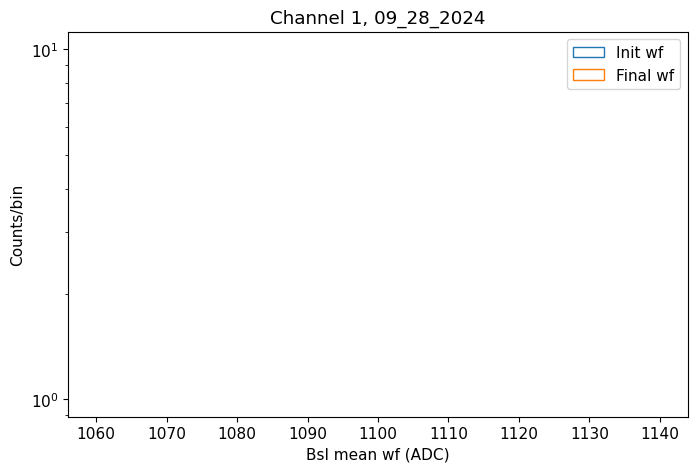

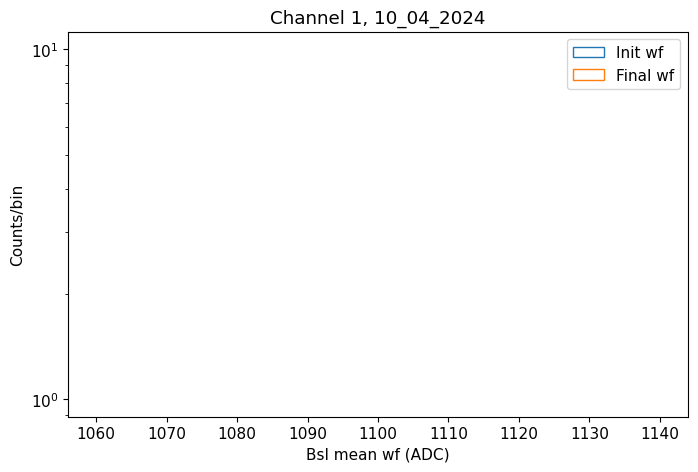

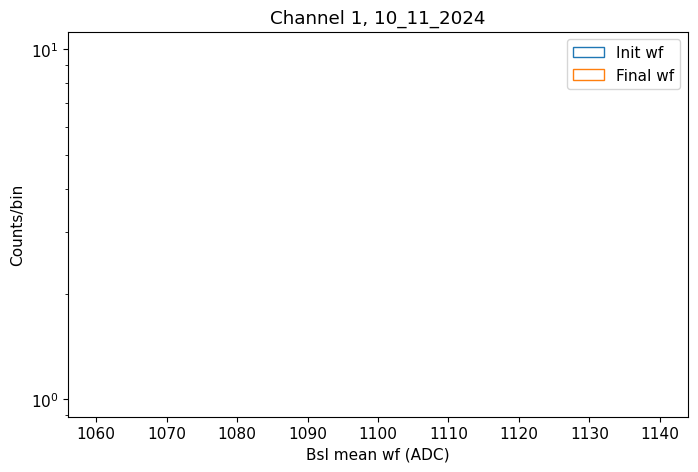

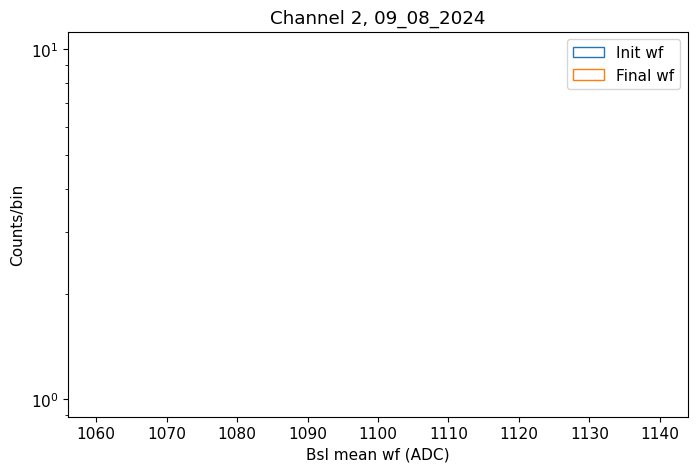

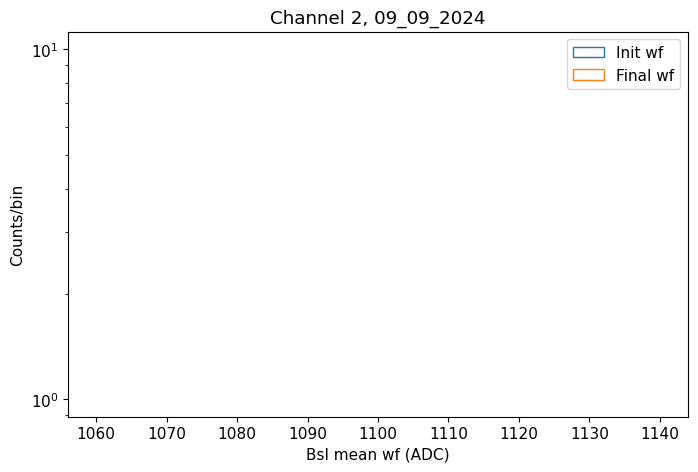

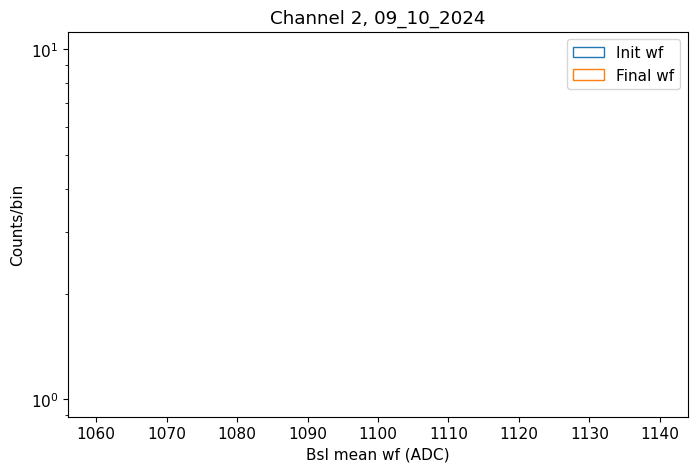

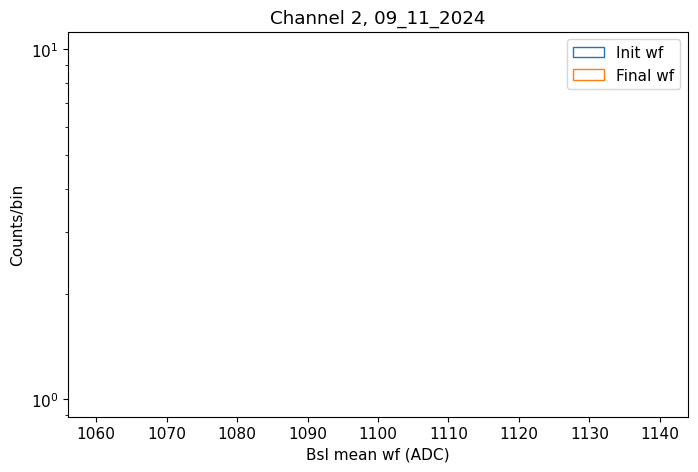

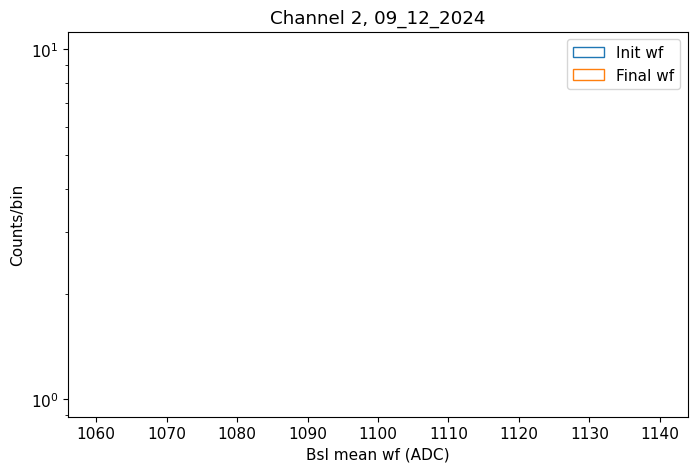

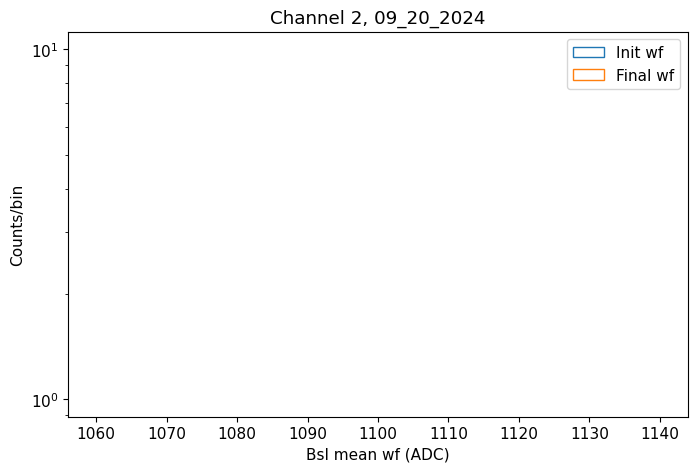

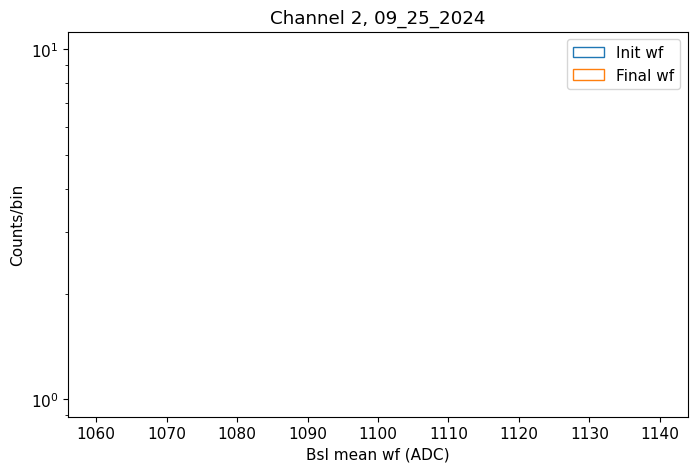

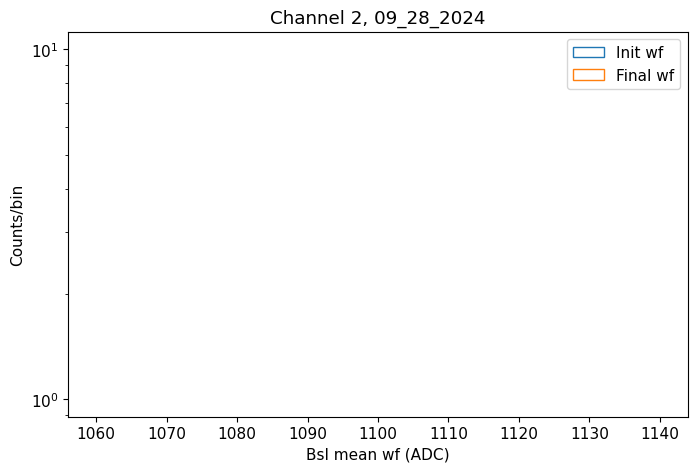

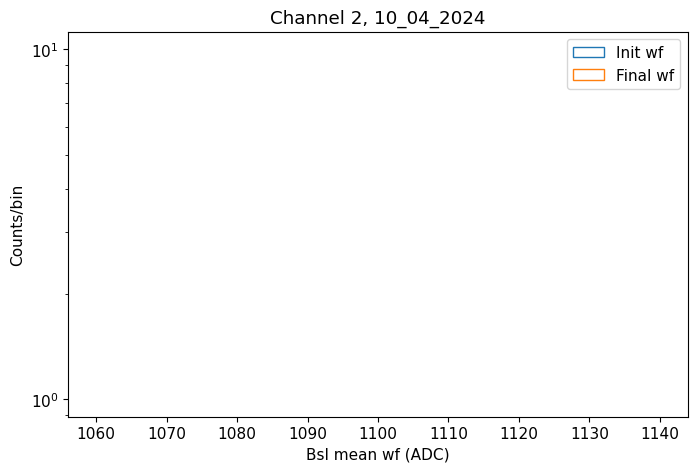

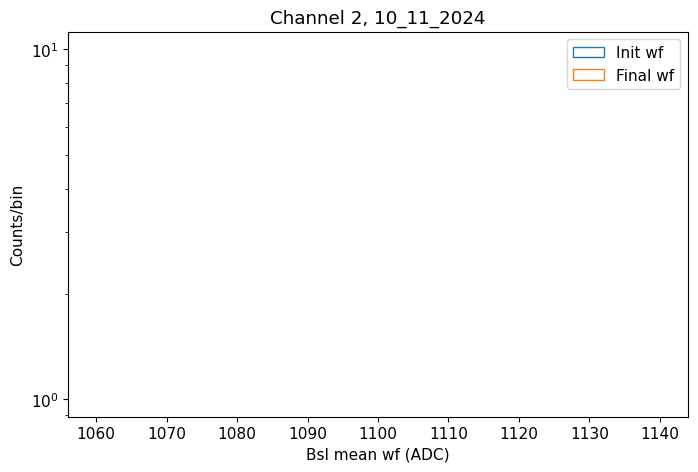

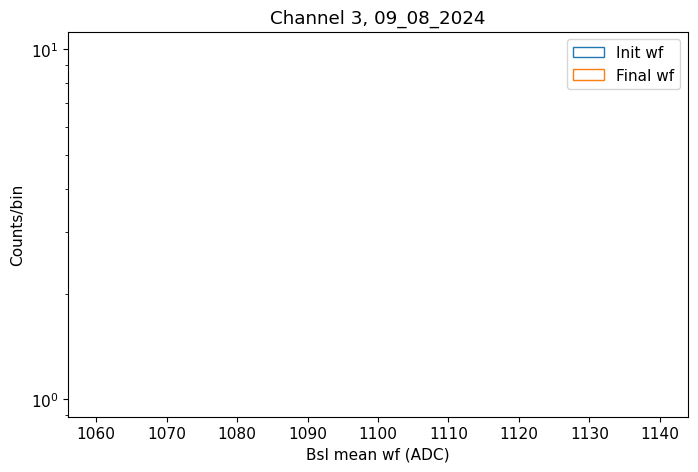

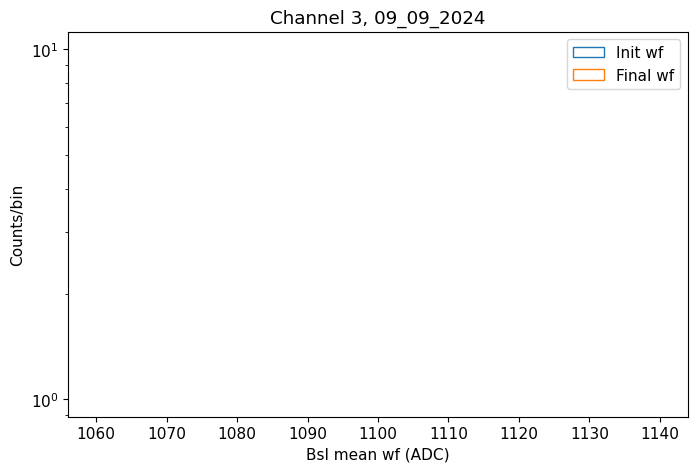

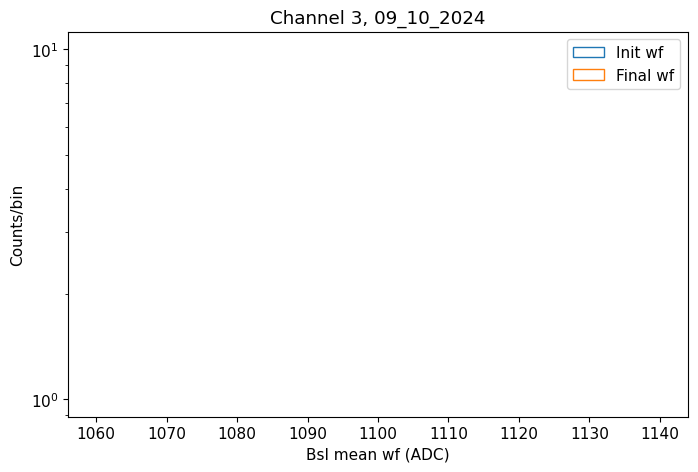

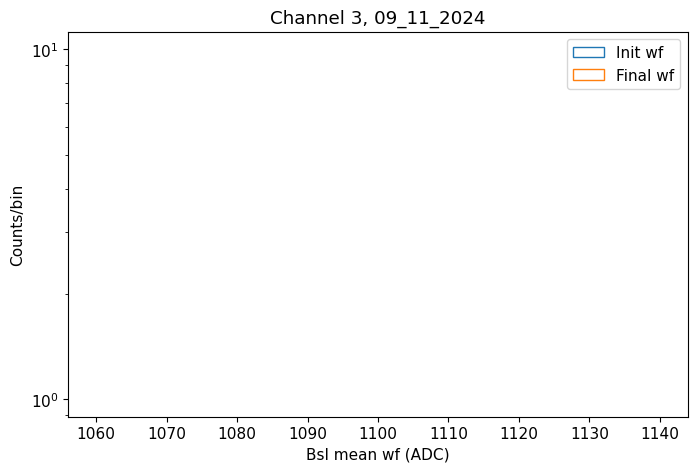

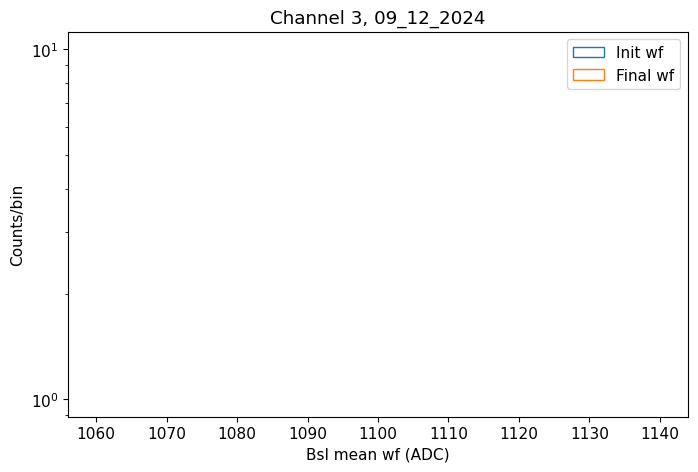

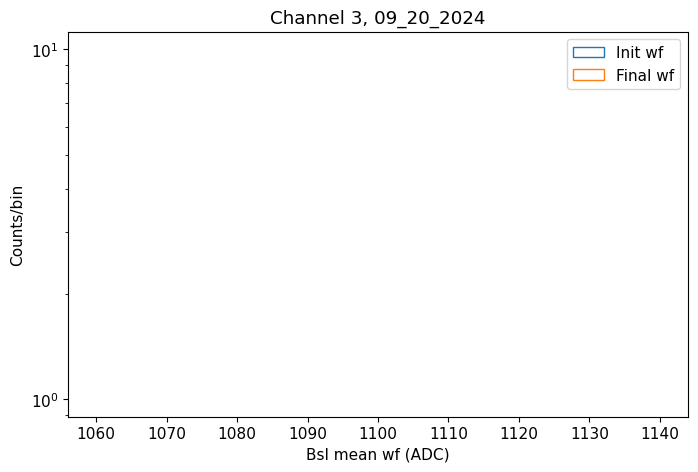

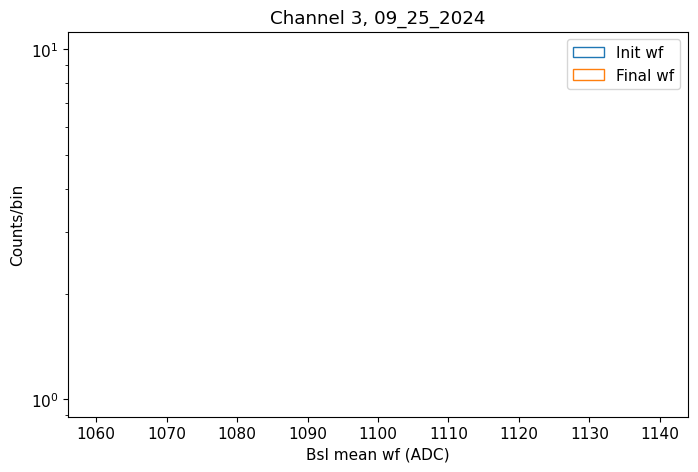

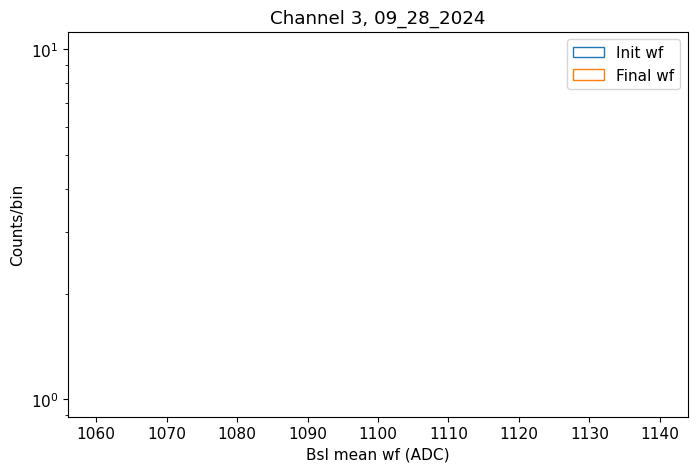

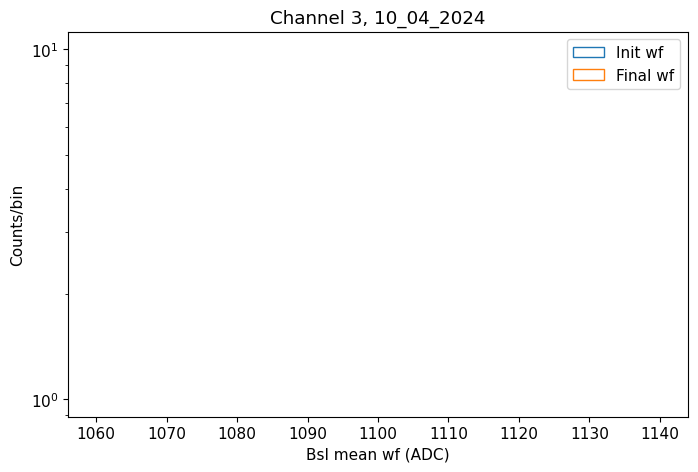

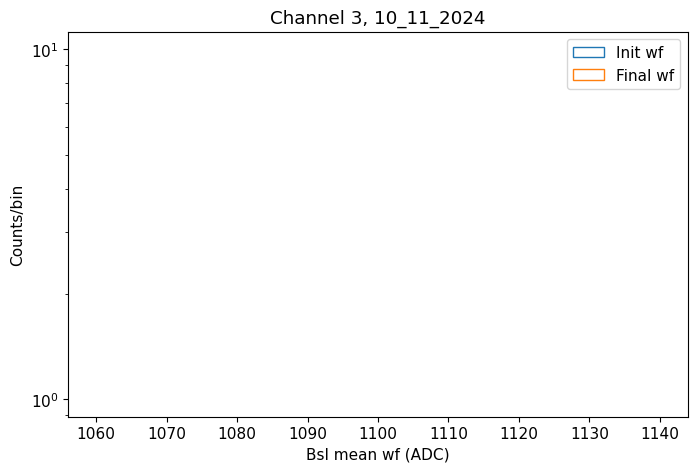

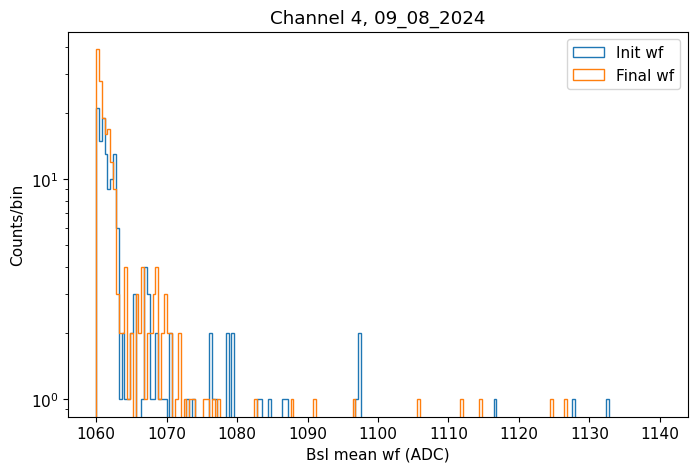

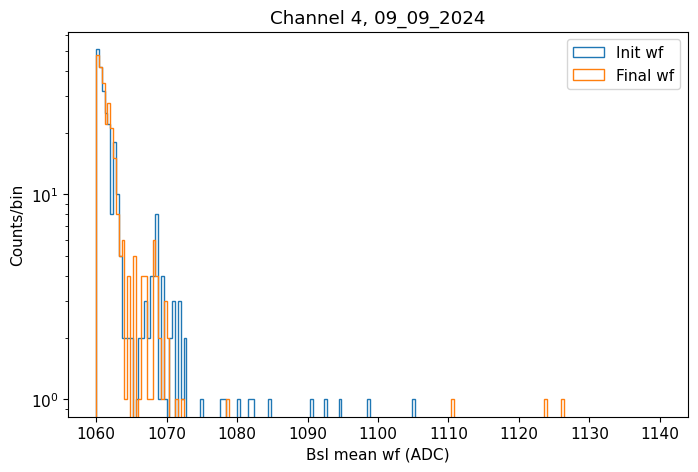

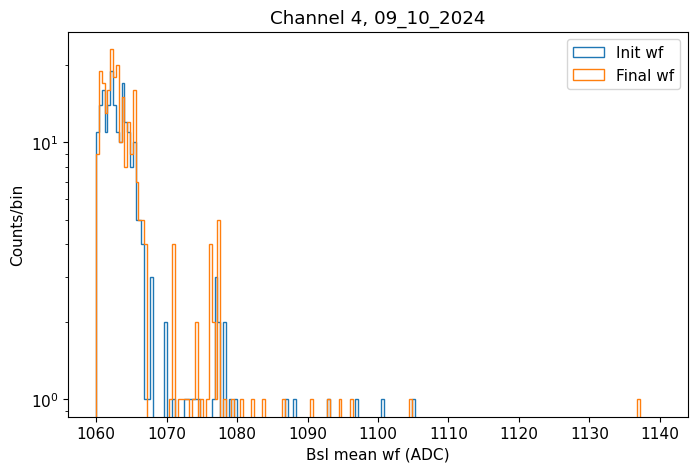

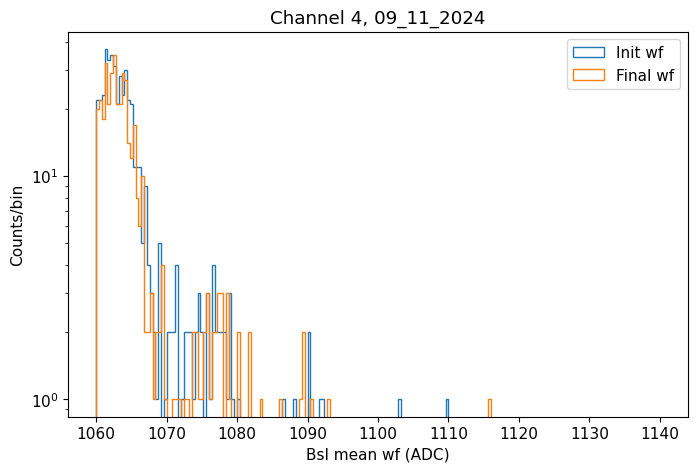

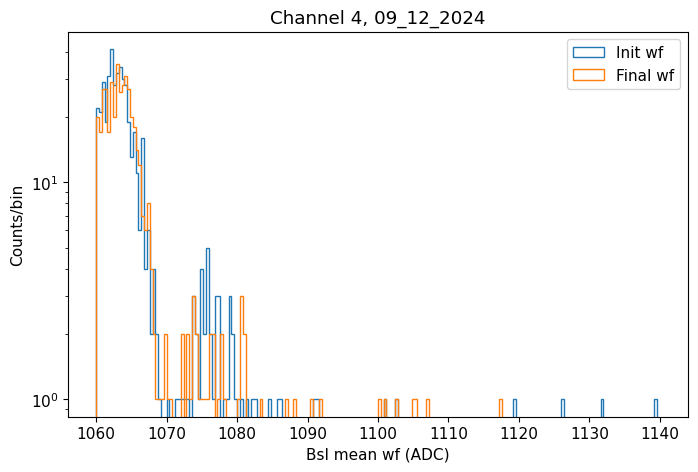

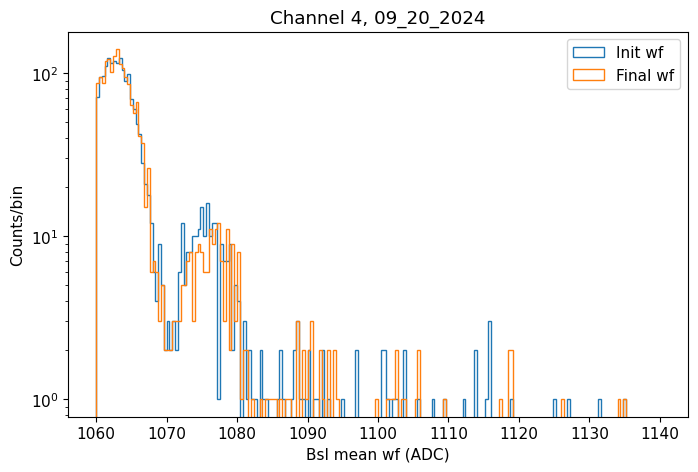

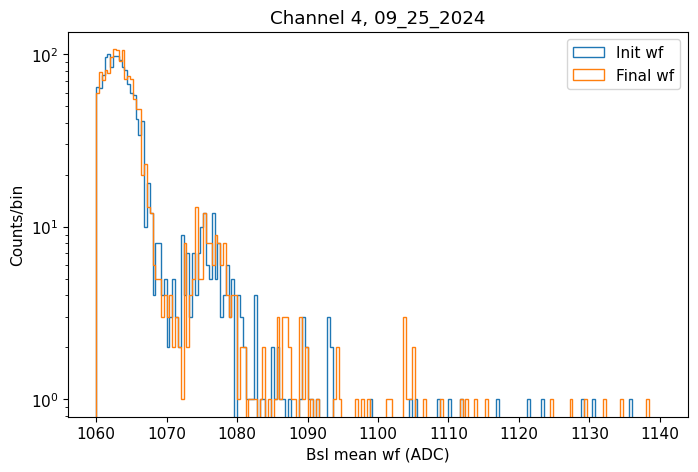

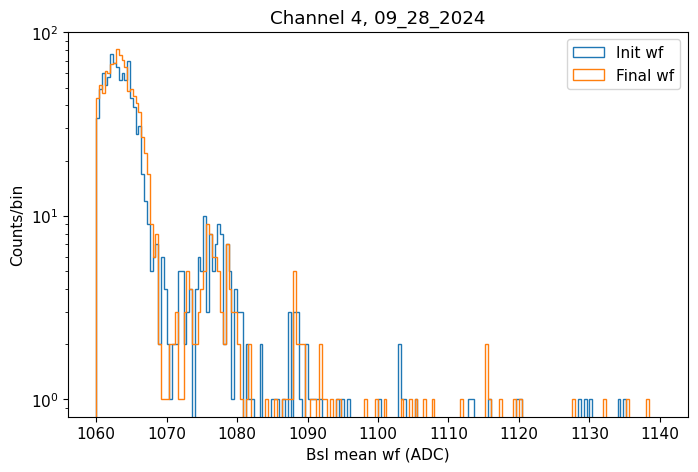

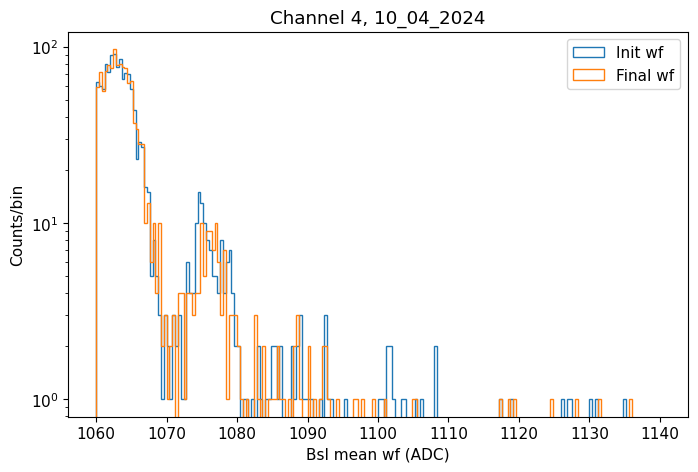

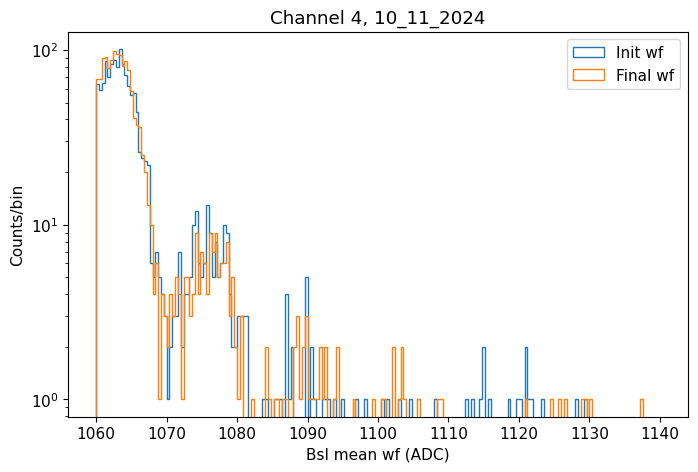

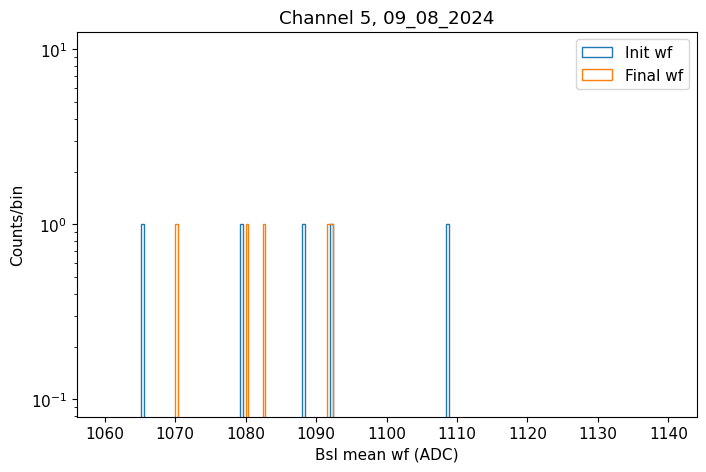

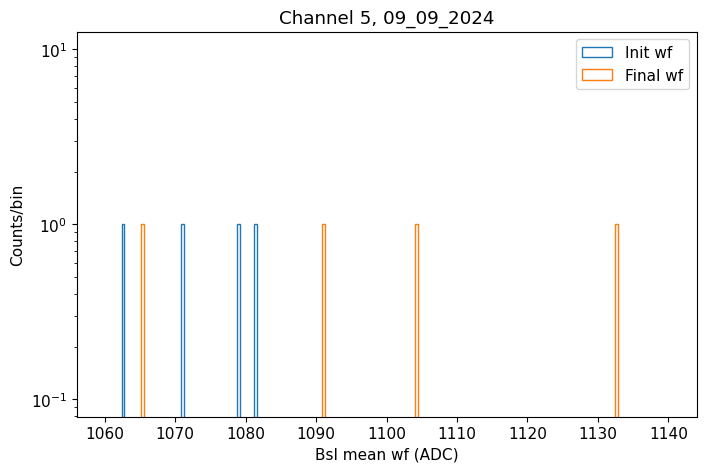

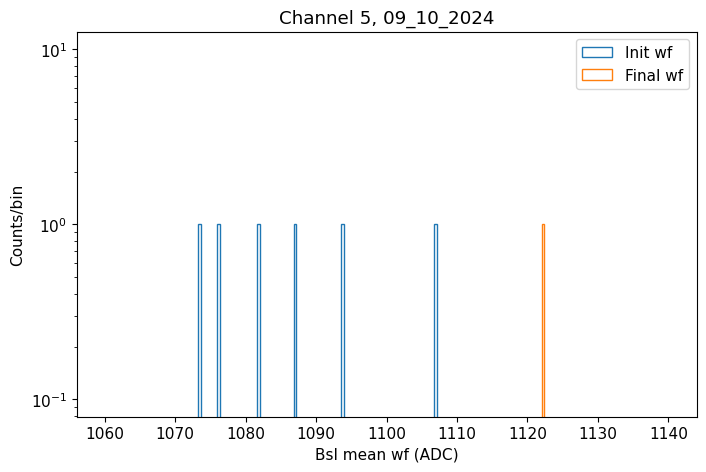

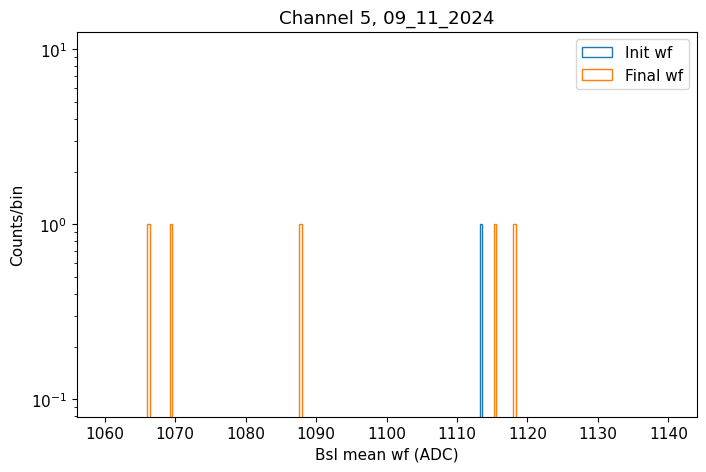

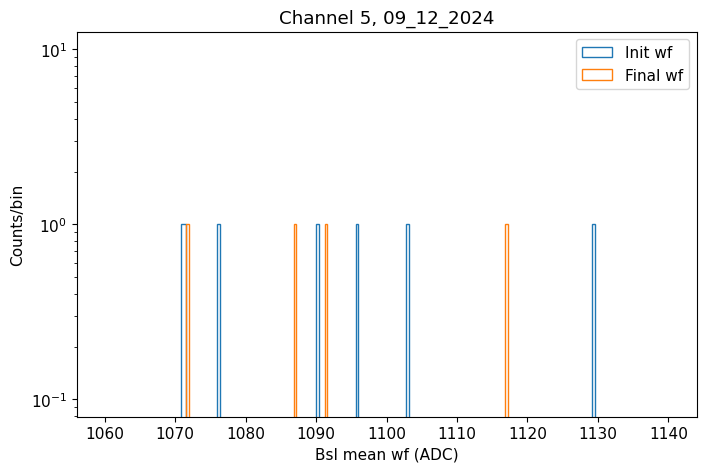

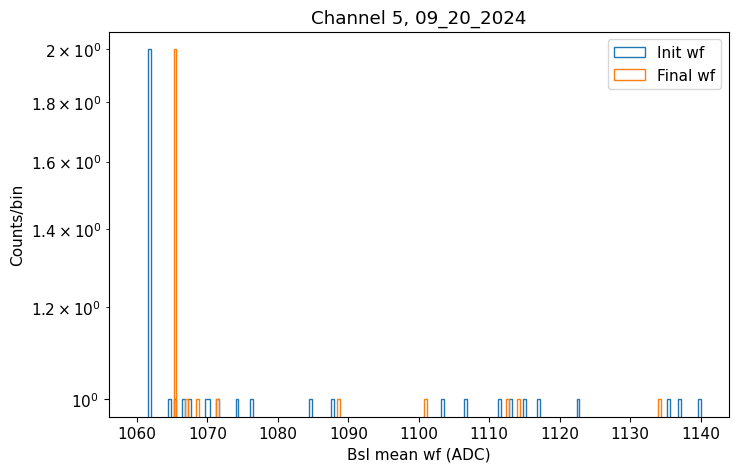

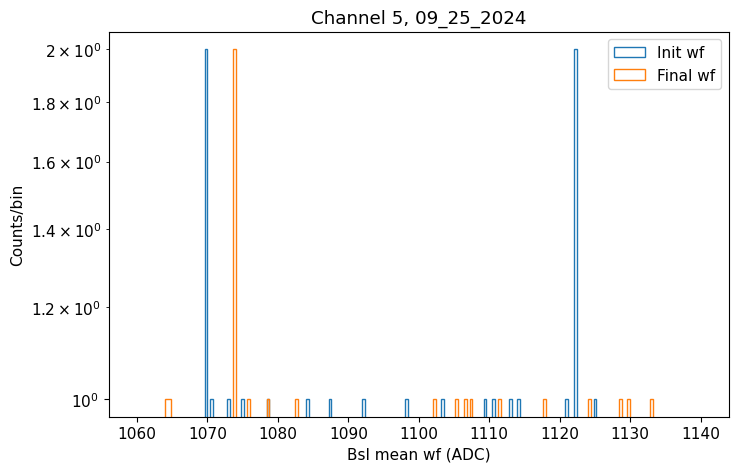

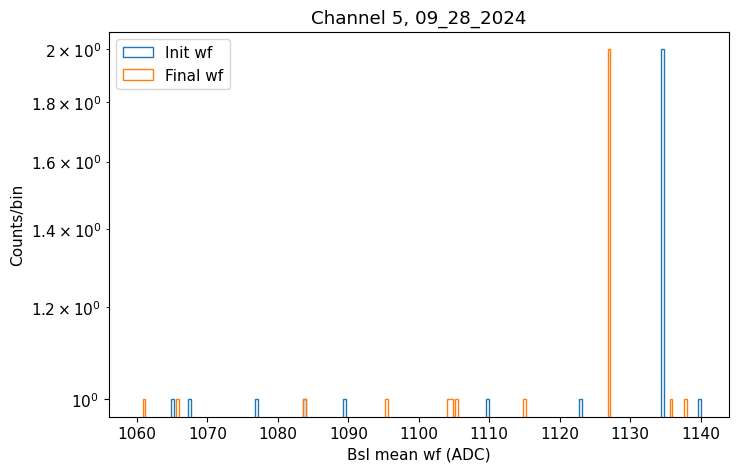

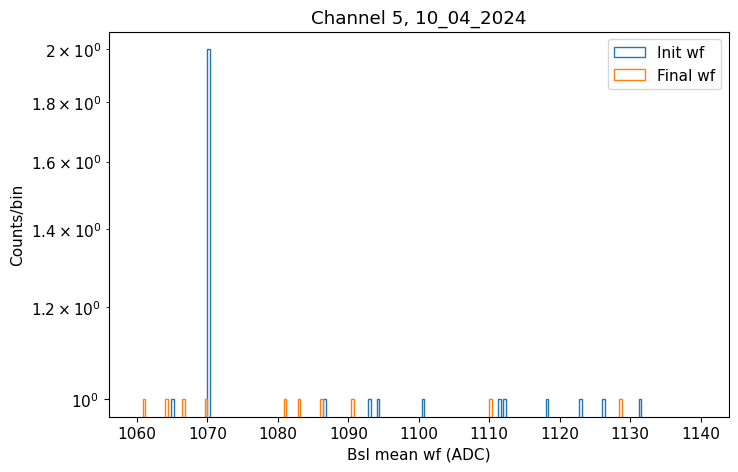

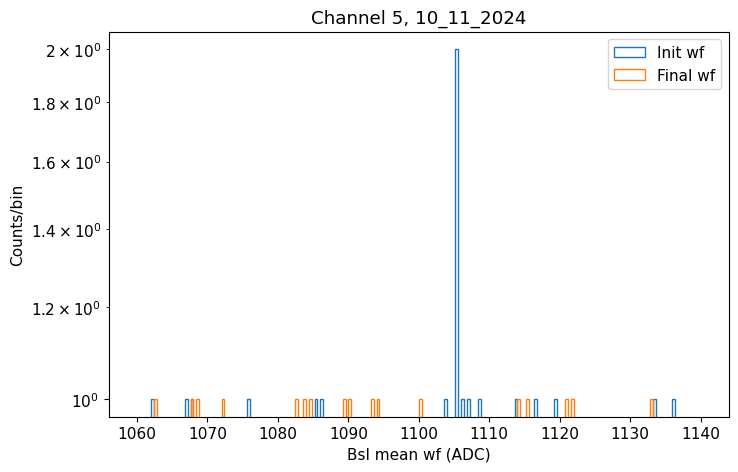

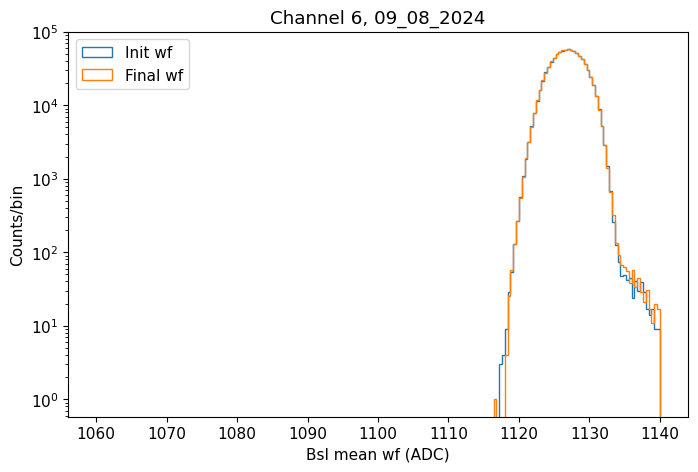

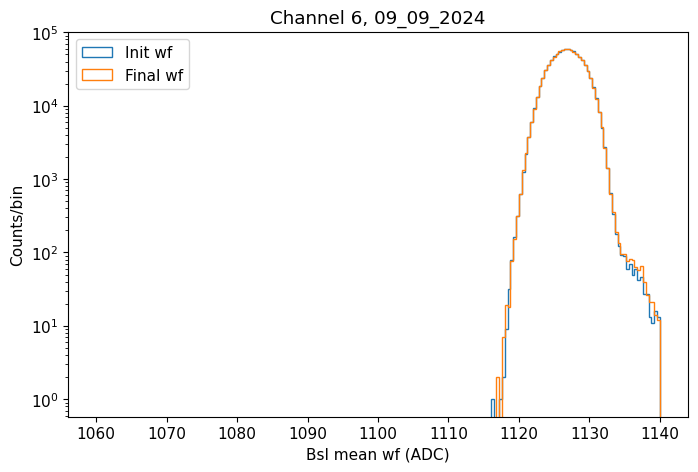

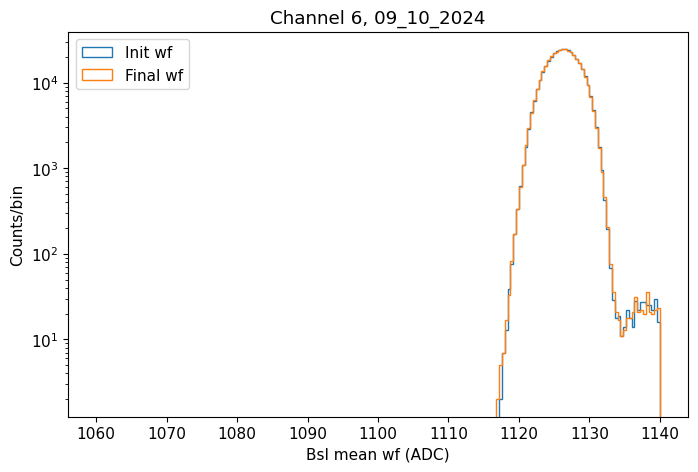

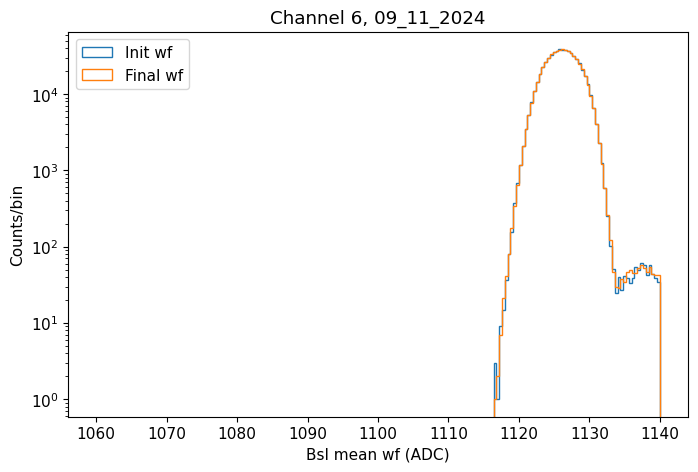

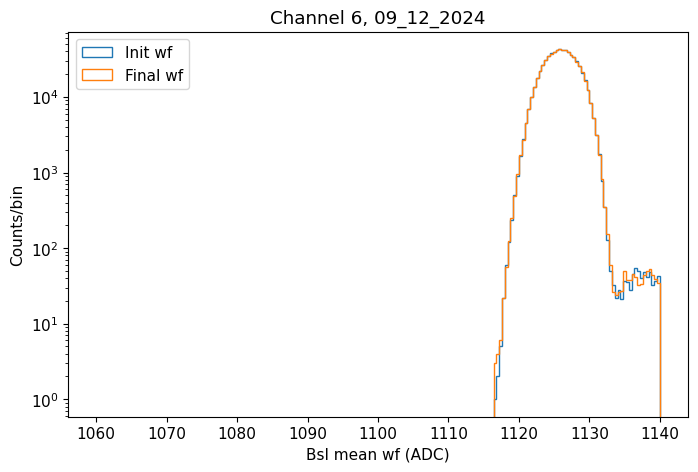

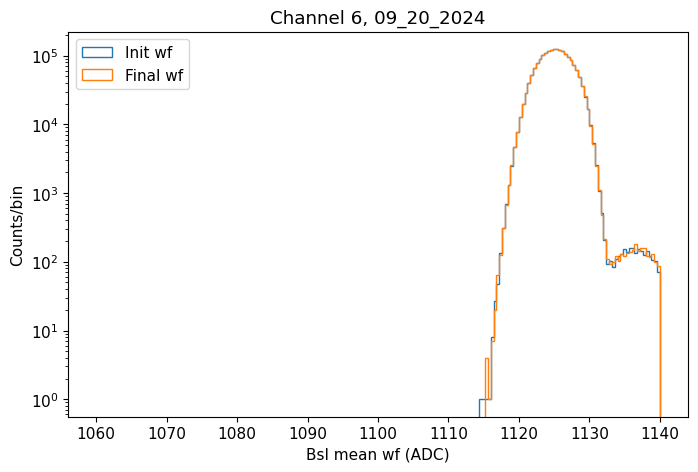

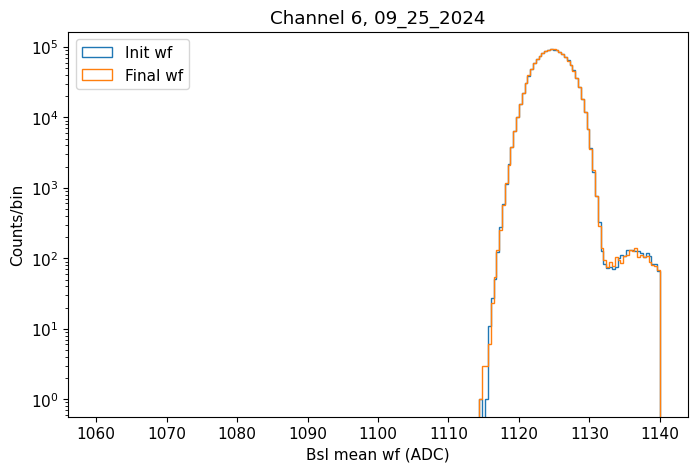

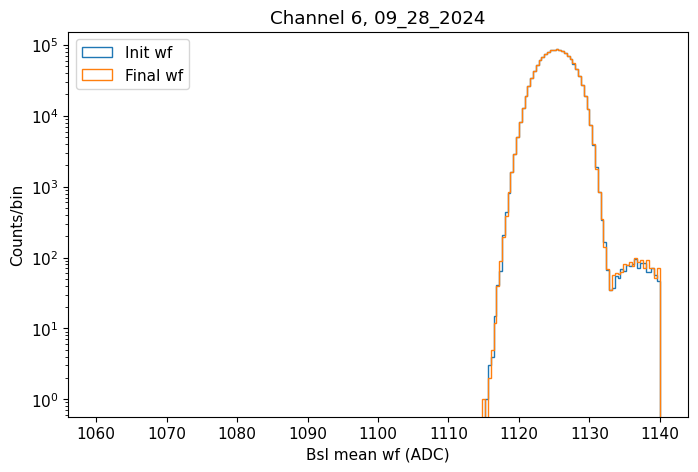

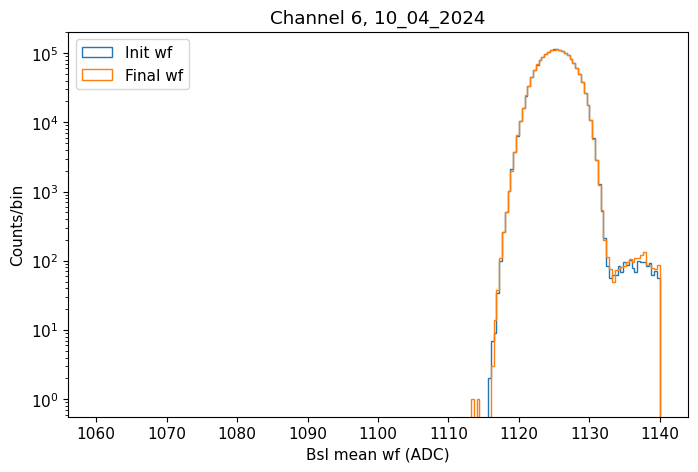

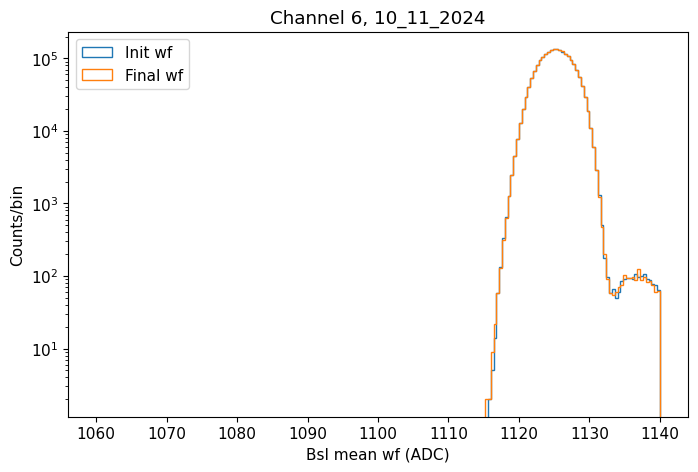

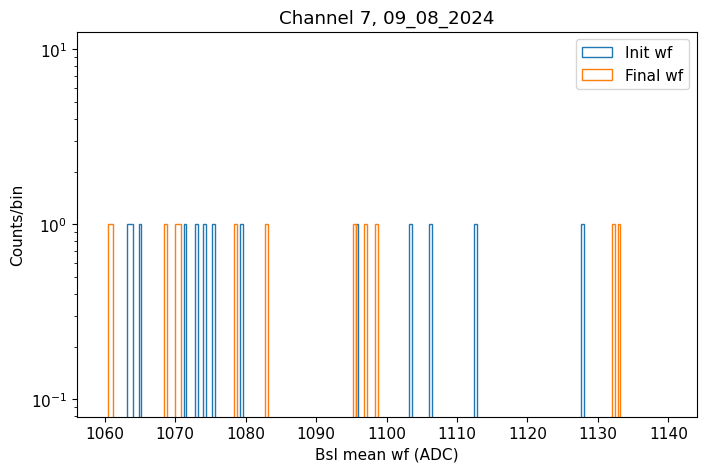

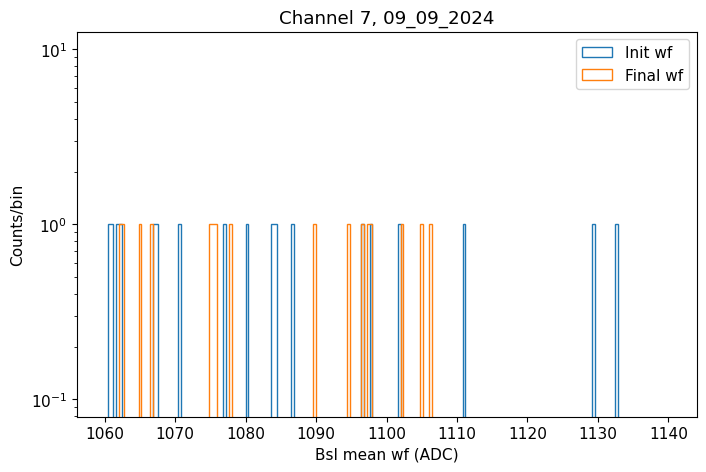

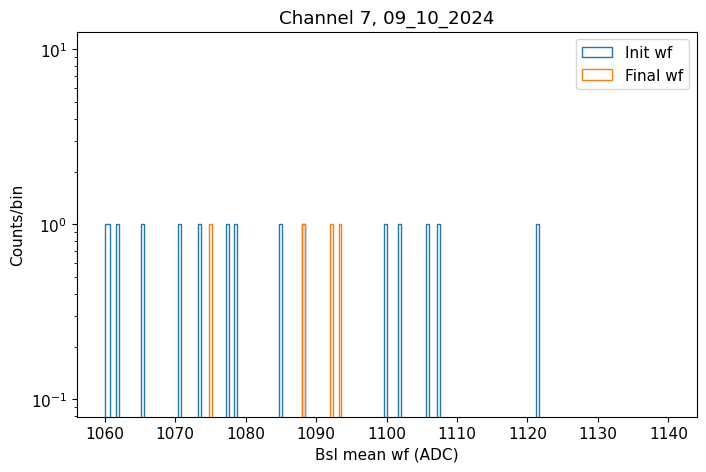

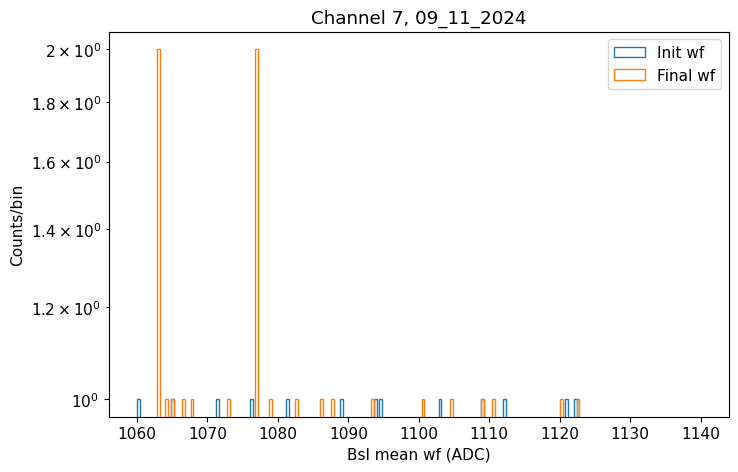

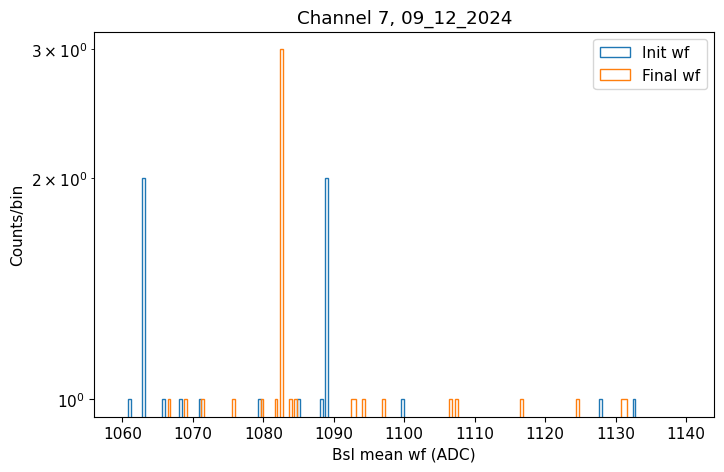

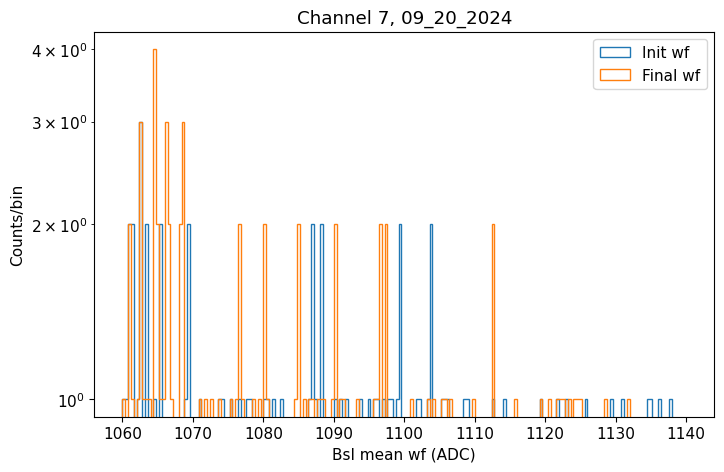

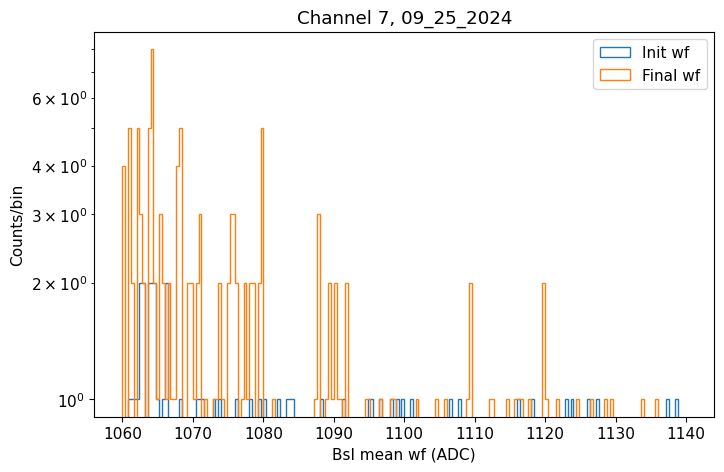

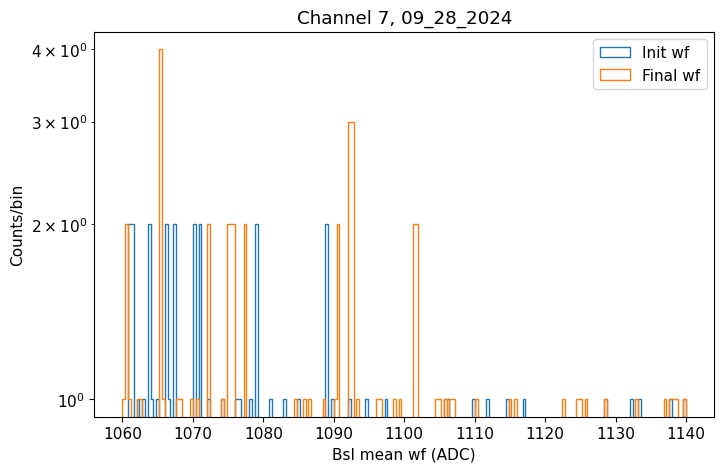

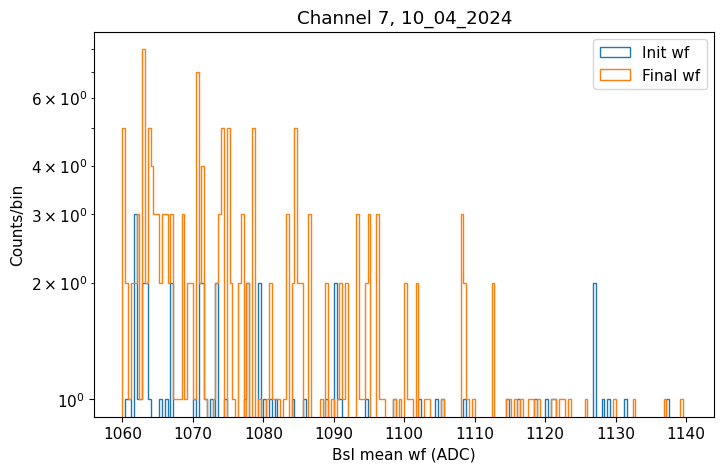

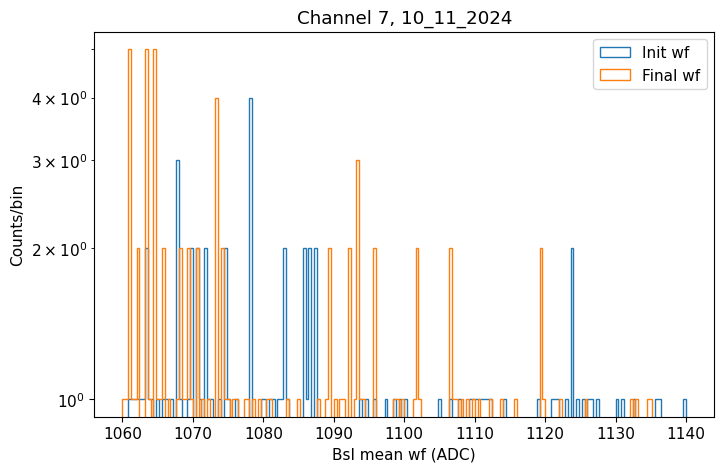

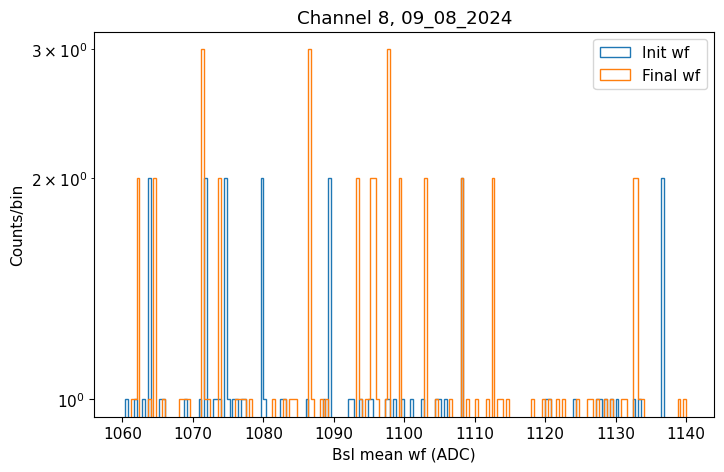

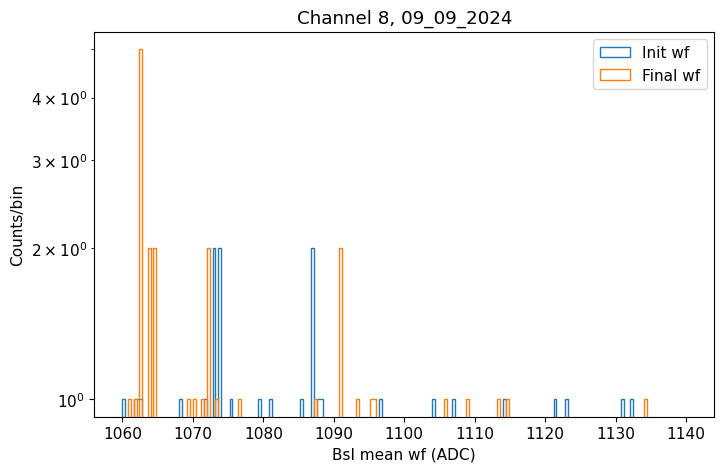

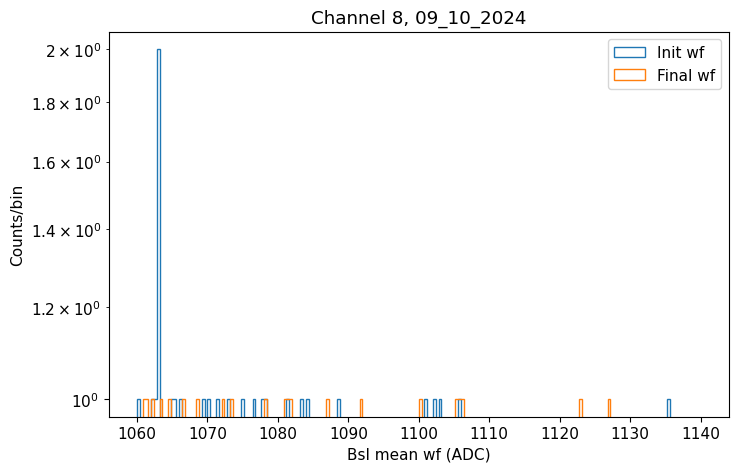

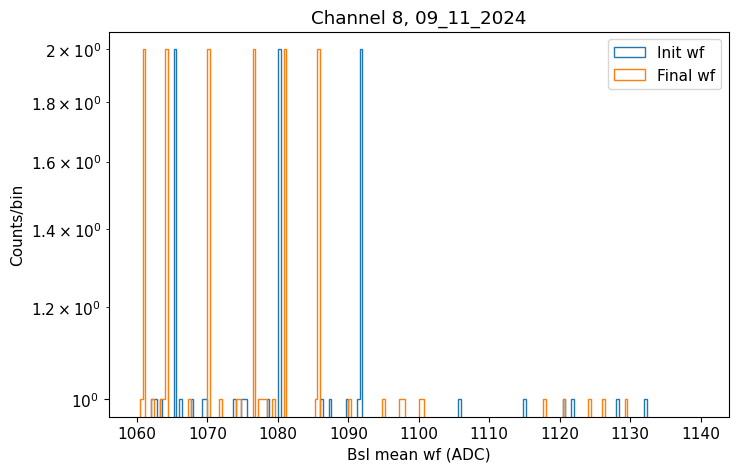

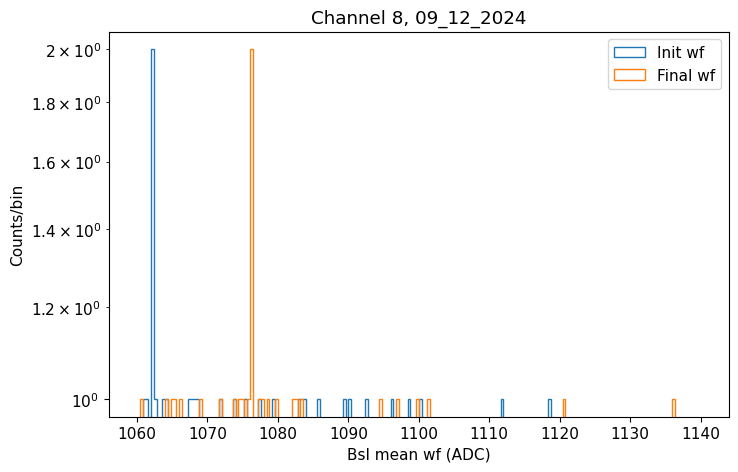

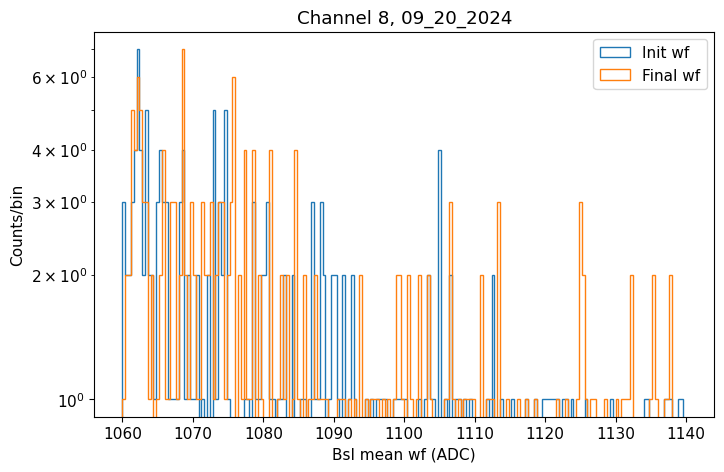

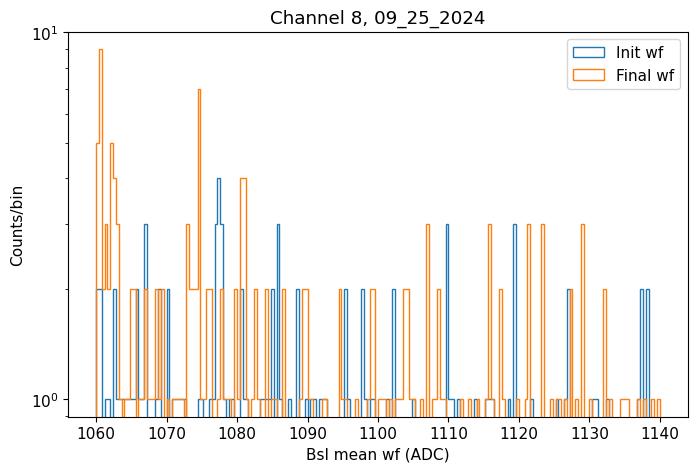

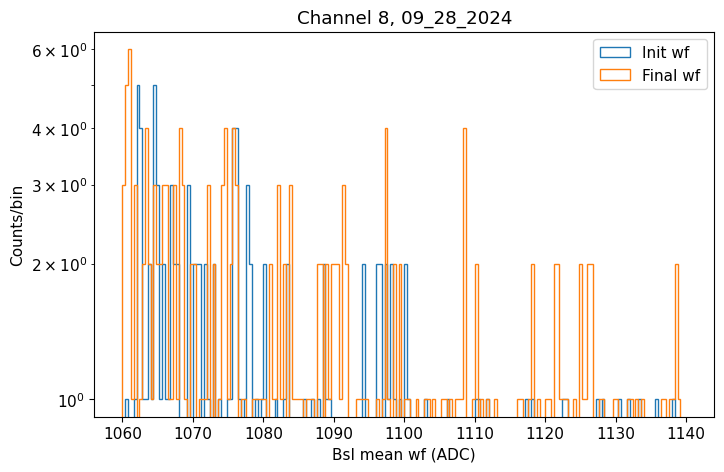

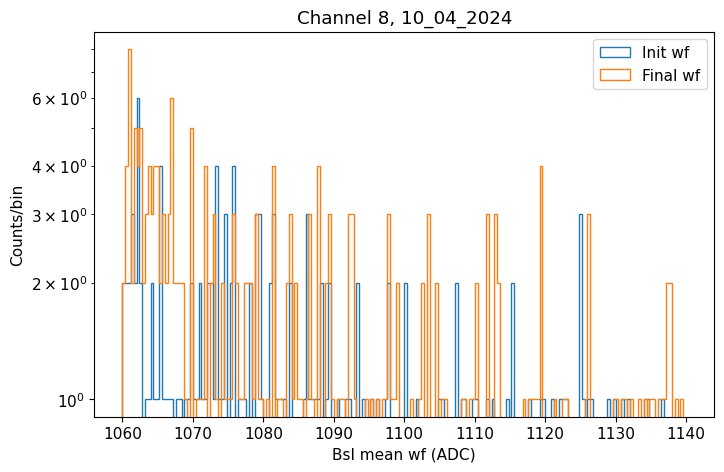

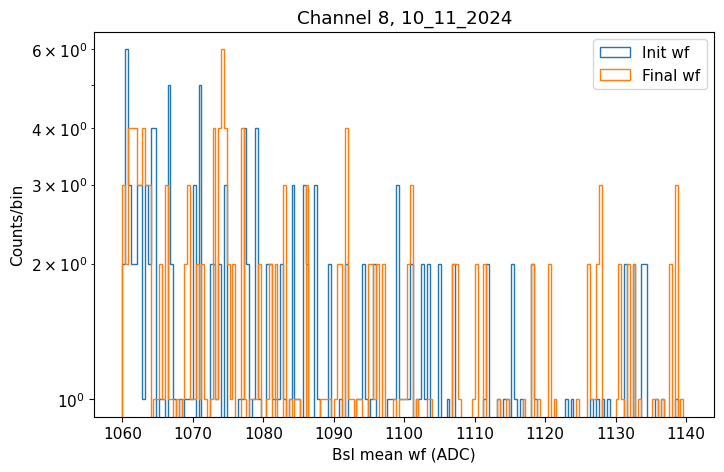

In [38]:
for sipm_ch in range(9):
    for sel_date in std_all_dict.keys():
        plt.hist(bsl_mean_i_dict[sel_date][sipm_ch], bins=200, range=(1060, 1140), label=f'Init wf',  histtype='step', log=True)
        plt.hist(bsl_mean_f_dict[sel_date][sipm_ch], bins=200, range=(1060, 1140), label=f'Final wf', histtype='step', log=True)
        plt.legend()
        plt.title(f'Channel {sipm_ch}, {sel_date}')
        plt.xlabel('Bsl mean wf (ADC)')
        plt.ylabel('Counts/bin')
        plt.show()

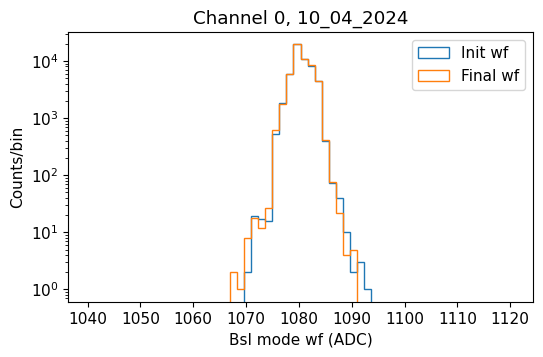

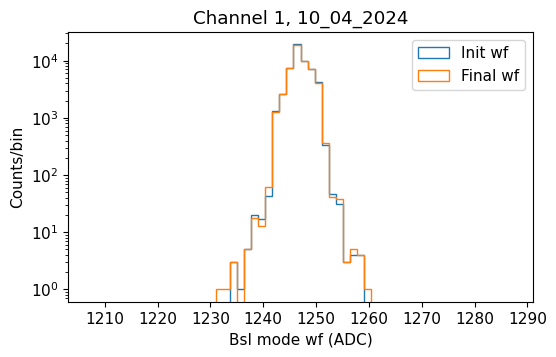

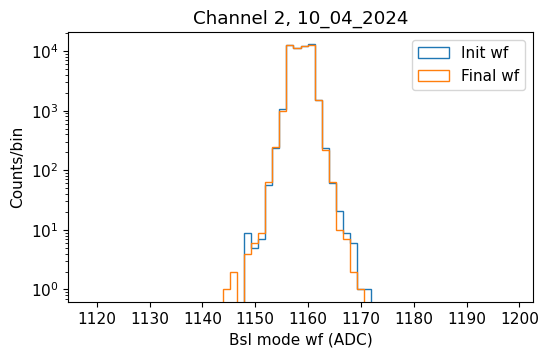

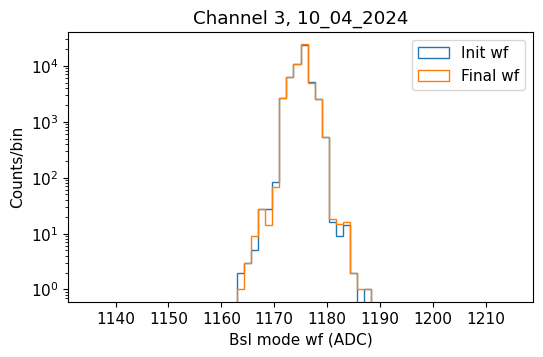

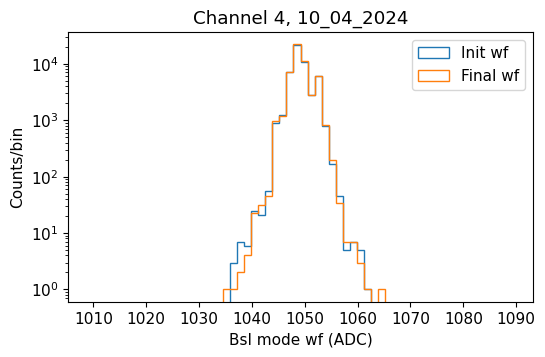

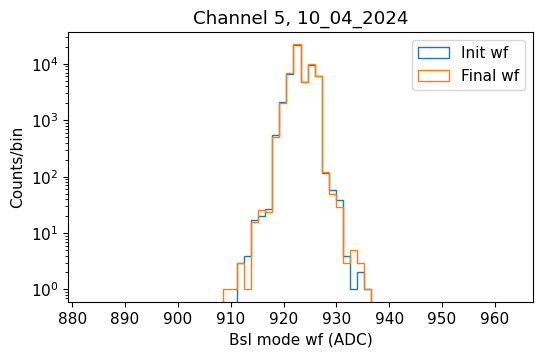

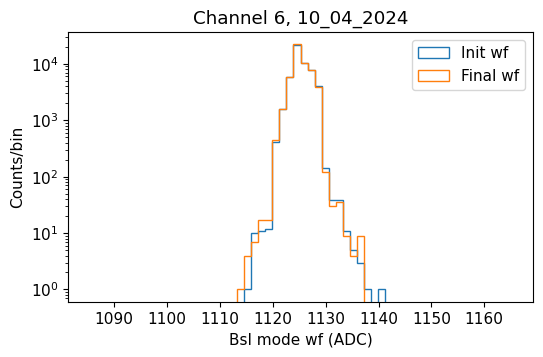

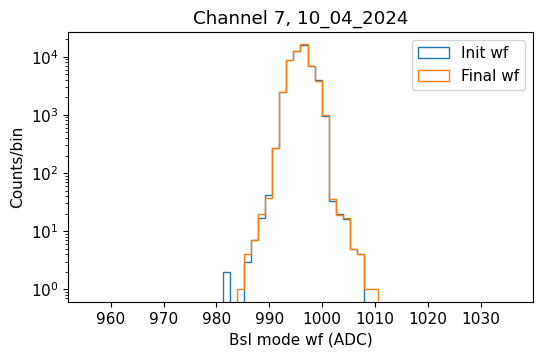

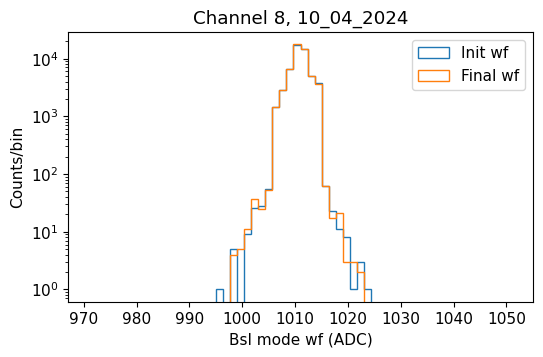

In [50]:
for sipm_ch in range(9):
    for sel_date in std_all_dict.keys():
        if sel_date!='10_04_2024':
            continue
        mean_mode_val = np.mean(bsl_mode_i_dict[sel_date][sipm_ch])
        e_range = mean_mode_val-40, mean_mode_val+40
        plt.figure(figsize=(6, 3.5))
        plt.hist(bsl_mode_i_dict[sel_date][sipm_ch], bins=60, range=e_range, label=f'Init wf',  histtype='step', log=True)
        plt.hist(bsl_mode_f_dict[sel_date][sipm_ch], bins=60, range=e_range, label=f'Final wf', histtype='step', log=True)
        plt.legend()
        plt.title(f'Channel {sipm_ch}, {sel_date}')
        plt.xlabel('Bsl mode wf (ADC)')
        plt.ylabel('Counts/bin')
        plt.show()

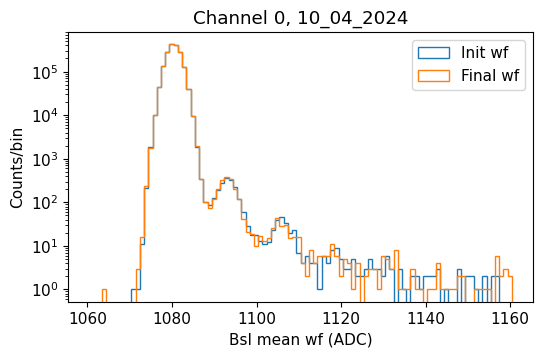

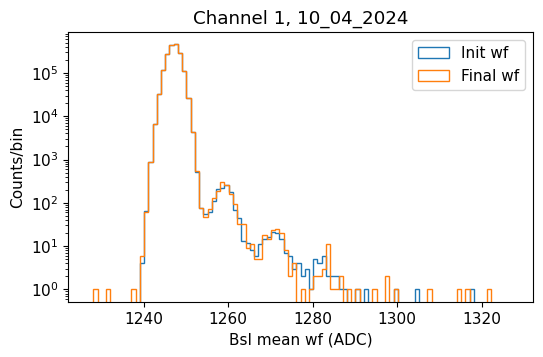

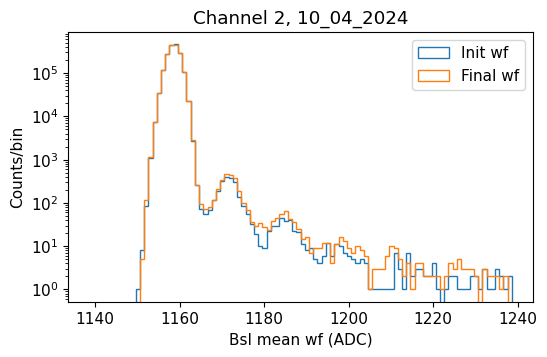

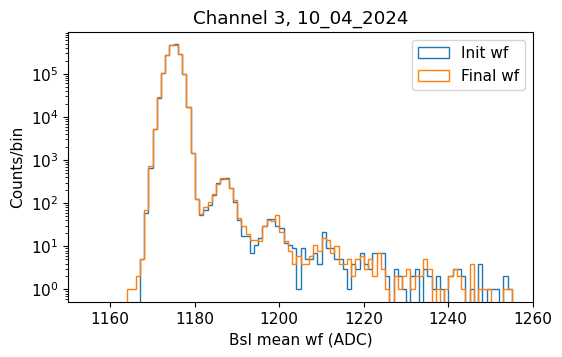

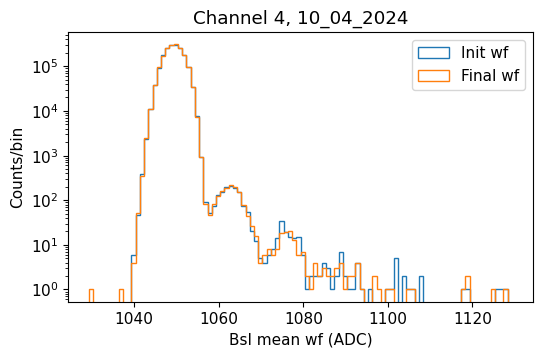

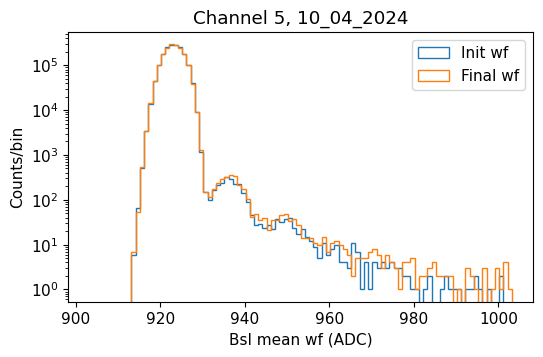

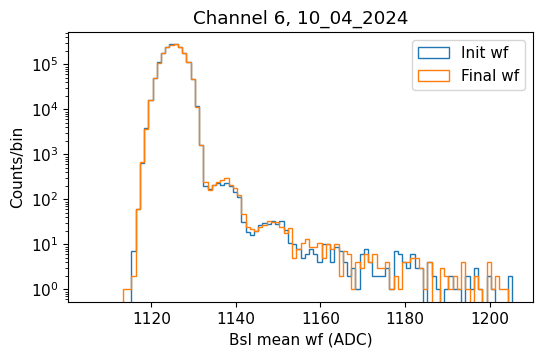

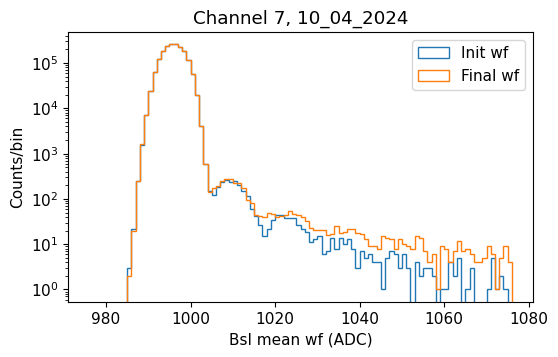

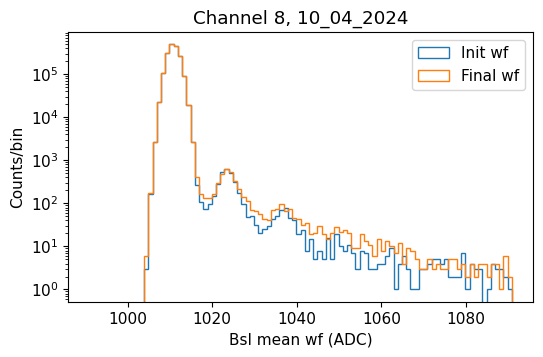

In [53]:
for sipm_ch in range(9):
    for sel_date in std_all_dict.keys():
        if sel_date!='10_04_2024':
            continue
        mean_mean_val = np.mean(bsl_mean_i_dict[sel_date][sipm_ch])
        e_range = mean_mean_val-20, mean_mean_val+80
        plt.figure(figsize=(6, 3.5))
        plt.hist(bsl_mean_i_dict[sel_date][sipm_ch], bins=100, range=e_range, label=f'Init wf',  histtype='step', log=True)
        plt.hist(bsl_mean_f_dict[sel_date][sipm_ch], bins=100, range=e_range, label=f'Final wf', histtype='step', log=True)
        plt.legend()
        plt.title(f'Channel {sipm_ch}, {sel_date}')
        plt.xlabel('Bsl mean wf (ADC)')
        plt.ylabel('Counts/bin')
        plt.show()